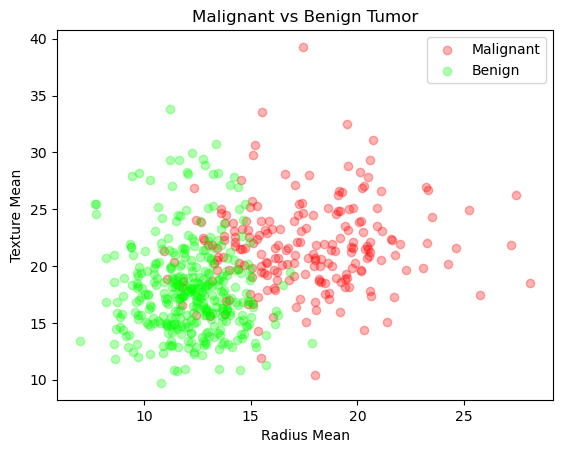

Training set shape: (341, 30) (341,)
Validation set shape: (114, 30) (114,)
Test set shape: (114, 30) (114,)


In [3]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, validation_curve, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

dataset = pd.read_csv("data.csv")

# Data Visualization
def plot_data(df):
    M = df[df.diagnosis == "M"]
    B = df[df.diagnosis == "B"]
    plt.title("Malignant vs Benign Tumor")
    plt.xlabel("Radius Mean")
    plt.ylabel("Texture Mean")
    plt.scatter(M.radius_mean, M.texture_mean, color="red", label="Malignant", alpha=0.3)
    plt.scatter(B.radius_mean, B.texture_mean, color="lime", label="Benign", alpha=0.3)
    plt.legend()
    plt.show()

plot_data(dataset)

# Data Preprocessing
def preprocess_data(df):
    df = df.drop(["id", "Unnamed: 32"], axis=1)
    # Encode the target variable
    df.diagnosis = [1 if i == "M" else 0 for i in df.diagnosis]
    x = df.drop(["diagnosis"], axis=1)
    y = df.diagnosis.values
    return x, y

x, y = preprocess_data(dataset)

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize the datasets
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

# Print the shapes of the resulting datasets
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_valid.shape, y_valid.shape)
print("Test set shape:", x_test.shape, y_test.shape)



In [4]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [44]:
# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier(random_state=42)

In [45]:
# Fit the classifier on the training data
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
# Predict on the validation set
y_pred_valid = dt.predict(x_valid)

In [48]:
import time
start_time = time.time()
# Calculate validation set metrics
accuracy = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid)
recall = recall_score(y_valid, y_pred_valid)
f1 = f1_score(y_valid, y_pred_valid)
# Calculate the completed training time
completed_training_time_validation = time.time() - start_time

In [49]:
# Print validation set metrics
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Completed Training Time (Validation): {completed_training_time_validation:.2f} seconds")

Validation Set Metrics:
Accuracy: 0.94
Precision: 0.97
Recall: 0.86
F1 Score: 0.91
Completed Training Time (Validation): 0.01 seconds


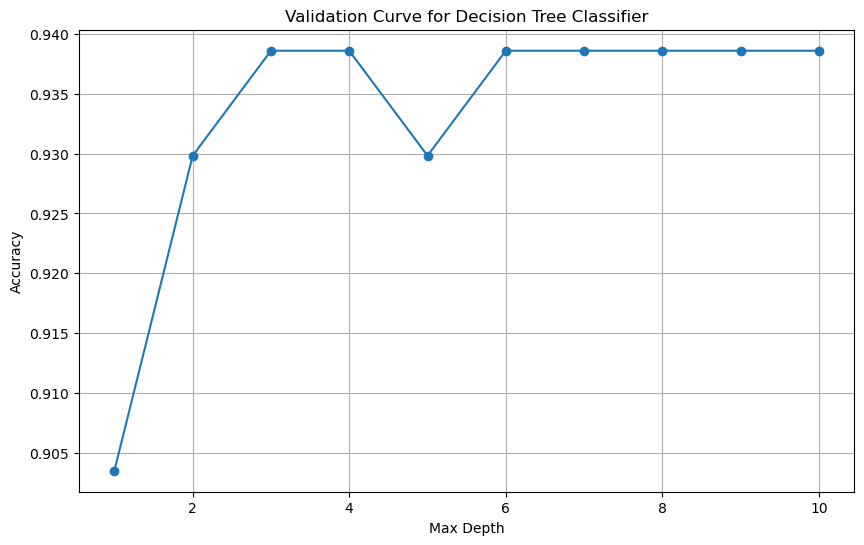

In [50]:
# Plot the validation curve
# You can change the hyperparameter being varied (e.g., max_depth) and the range accordingly
param_range = np.arange(1, 11)

valid_scores = []

for max_depth in param_range:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(x_train, y_train)
    y_pred_valid = dt.predict(x_valid)
    valid_accuracy = accuracy_score(y_valid, y_pred_valid)
    valid_scores.append(valid_accuracy)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve for Decision Tree Classifier")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(param_range, valid_scores, marker='o')
plt.grid()
plt.show()

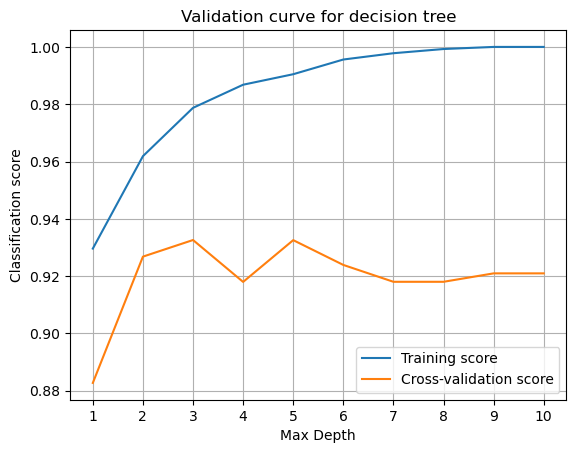

In [51]:
from sklearn.model_selection import validation_curve

# Create a DecisionTreeClassifier instance
clf_dt = DecisionTreeClassifier(random_state=42)

# Define the range of max_depth values to explore
depth_range = np.arange(1, 11)

# Calculate training and validation scores for different max_depth values
train_scores, test_scores = validation_curve(clf_dt, x_train, y_train, param_name="max_depth", param_range=depth_range, cv=5)

# Plot the validation curve
plt.figure()
plt.xticks(depth_range)
plt.plot(depth_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for decision tree')
plt.xlabel('Max Depth')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV
import time

# Define a range of max_depth values to search
depth_range = np.arange(1, 11)

# Define the hyperparameters to tune
param_grid = {'max_depth': depth_range}

# Create a DecisionTreeClassifier instance
clf_dt = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(clf_dt, param_grid=param_grid, cv=5)

# Measure training time
t0 = time.time()
grid_search.fit(x_train, y_train)
t1 = time.time()
train_time = t1 - t0
print('Completed training in %f seconds' % train_time)

# Get the best classifier and best parameters
best_clf_dt = grid_search.best_estimator_
best_dt_params = grid_search.best_params_

print("Best parameters set for decision tree found on development set:")
print(best_dt_params)

# Measure inference time on test data
t0 = time.time()
y_pred = best_clf_dt.predict(x_valid)
t1 = time.time()
test_time = t1 - t0
print('Inference time on validation data: %f seconds' % test_time)

# Calculate accuracy on validation data
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy of decision tree on validation data is %.2f%%' % (accuracy * 100))

Completed training in 0.249300 seconds
Best parameters set for decision tree found on development set:
{'max_depth': 3}
Inference time on validation data: 0.000777 seconds
Accuracy of decision tree on validation data is 93.86%


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics on validation data
y_pred = best_clf_dt.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
cm = confusion_matrix(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9385964912280702
Precision: 0.9736842105263158
Recall: 0.8604651162790697
F1 Score: 0.9135802469135803
Confusion Matrix:
 [[70  1]
 [ 6 37]]


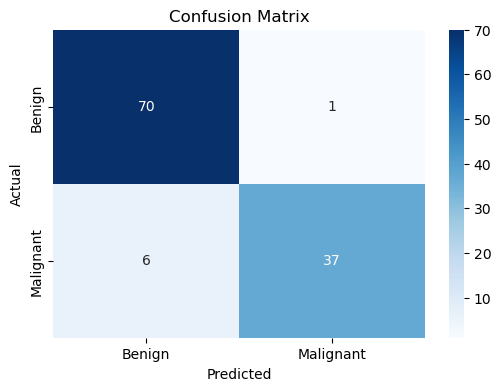

In [54]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

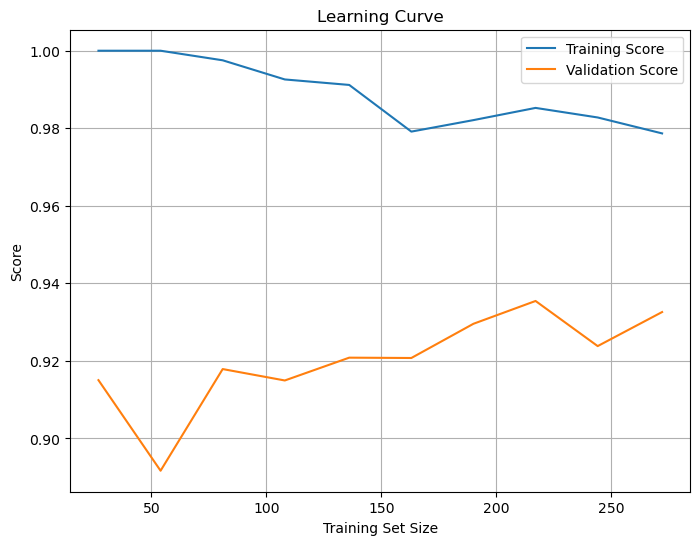

In [55]:
train_sizes, train_scores, valid_scores = learning_curve(best_clf_dt, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [57]:
# ROC Curve and AUC
y_scores = cross_val_predict(best_clf_dt, x_valid, y_valid, cv=5, method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_valid, y_scores[:, 1])
roc_auc = roc_auc_score(y_valid, y_scores[:, 1])

# Confusion Matrix
y_pred_valid = cross_val_predict(best_clf_dt, x_valid, y_valid, cv=5)
confusion = confusion_matrix(y_valid, y_pred_valid)

# Cross-Validation
cv_scores = cross_val_score(best_clf_dt, x_valid, y_valid, cv=5)

# Print ROC AUC score
print("ROC AUC Score:", roc_auc)

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion)

# Print Cross-Validation Scores
print("Cross-Validation Scores:", cv_scores)

ROC AUC Score: 0.9369472649852603
Confusion Matrix:
 [[67  4]
 [ 3 40]]
Cross-Validation Scores: [0.95652174 0.91304348 0.91304348 0.91304348 1.        ]


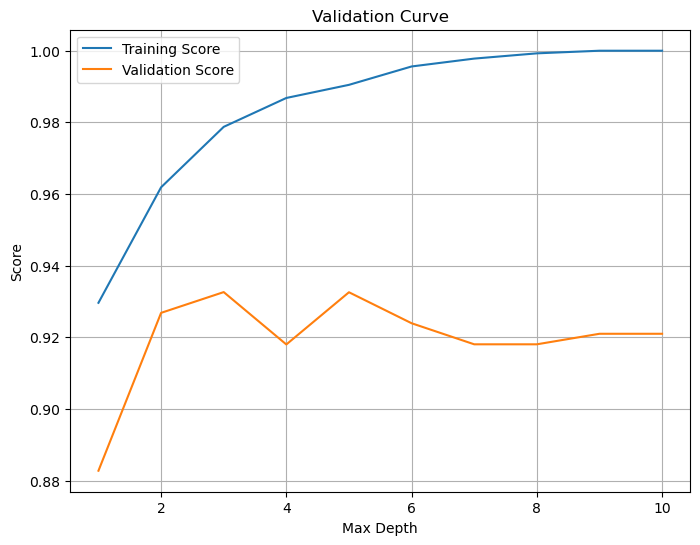

In [29]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 11)
train_scores, valid_scores = validation_curve(best_clf_dt, x_train, y_train, param_name="max_depth", param_range=param_range, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation Score')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.grid()
plt.show()

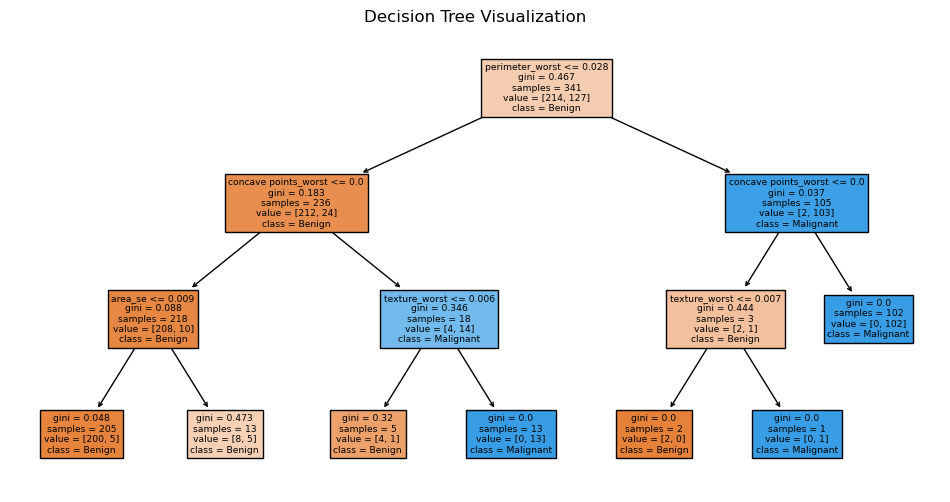

In [31]:
# Convert the feature names to a list
feature_names_list = list(x_train.columns)

plt.figure(figsize=(12, 6))
plot_tree(best_clf_dt, filled=True, feature_names=feature_names_list, class_names=['Benign', 'Malignant'])
plt.title("Decision Tree Visualization")
plt.show()

In [37]:
# Define the hyperparameter grid
param_grid = {'max_depth': np.arange(1, 11)}

# Initialize the DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(clf_dt, param_grid=param_grid, cv=5)

# Perform hyperparameter tuning on the training set
t0 = time.time()
grid_search.fit(x_train, y_train)
t1 = time.time()
train_time = [t1 - t0]  # Initialize train_time as a list

# Get the best classifier and hyperparameters
best_clf_dt = grid_search.best_estimator_
best_dt_params = grid_search.best_params_

print('Completed training in %f seconds' % train_time[0])
print("Best parameters set for decision tree found on development set:")
print(best_dt_params)

# Predict on the test set
y_pred_test = best_clf_dt.predict(x_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")


Completed training in 0.256056 seconds
Best parameters set for decision tree found on development set:
{'max_depth': 3}

Test Set Metrics:
Accuracy: 0.93
Precision: 1.00
Recall: 0.81
F1 Score: 0.89


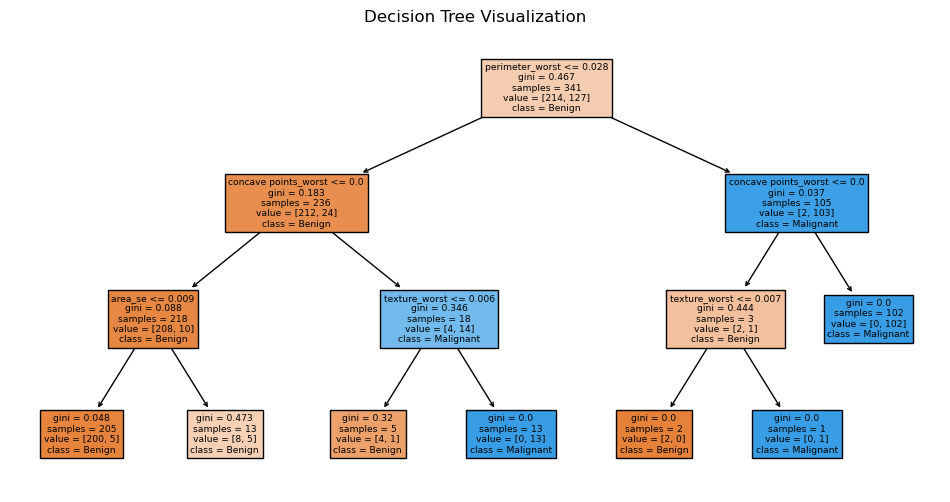

In [40]:
plt.figure(figsize=(12, 6))
# Convert DataFrame index to a list of feature names
feature_names = x_train.columns.tolist()
plot_tree(best_clf_dt, filled=True, feature_names=feature_names, class_names=['Benign', 'Malignant'])
plt.title("Decision Tree Visualization")
plt.show()

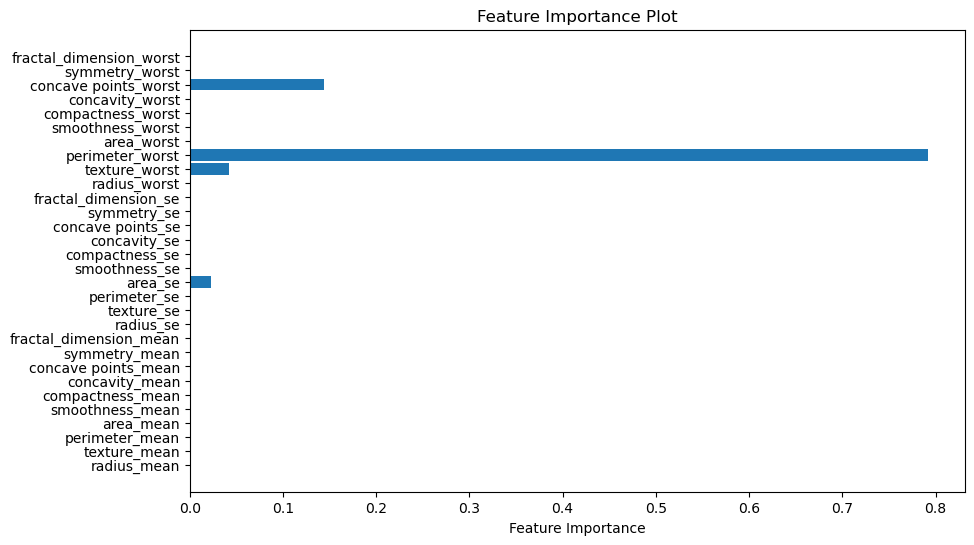

In [39]:
feature_importances = best_clf_dt.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(x_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

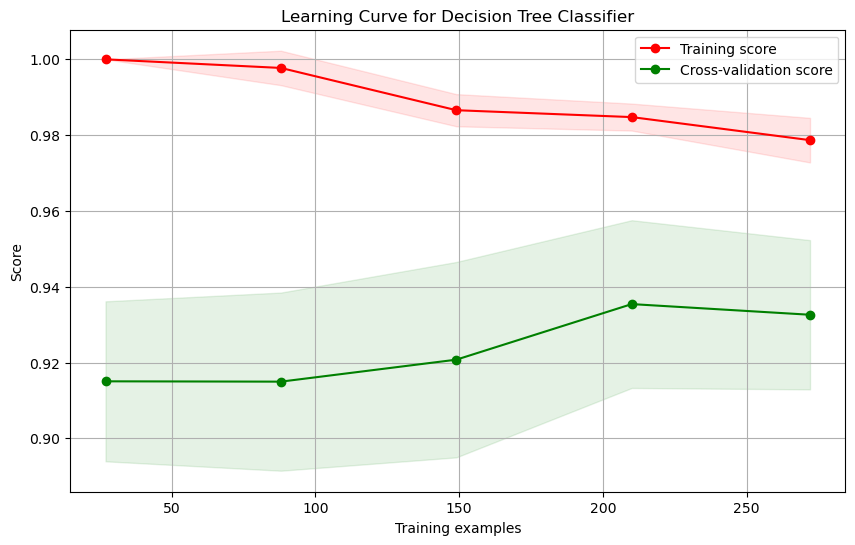

In [56]:
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    # Calculate mean and standard deviation for training and cross-validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot the learning curve for your decision tree classifier
title = "Learning Curve for Decision Tree Classifier"
plot_learning_curve(best_clf_dt, title, x_train, y_train, cv=5)
plt.show()

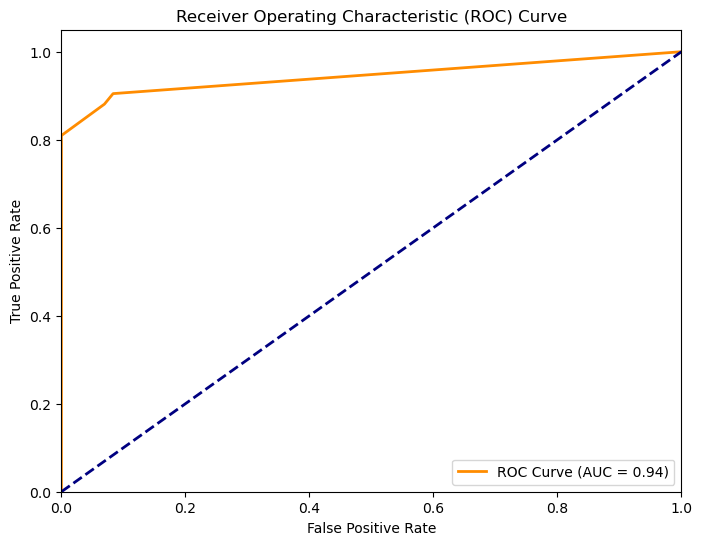

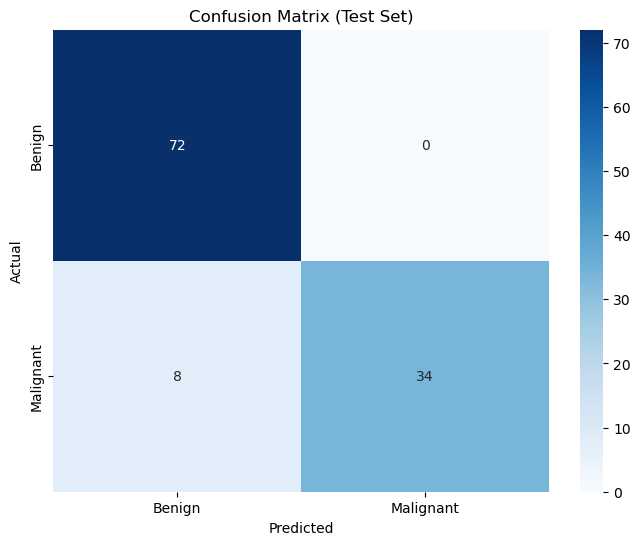

Cross-Validation Confusion Matrix:
 [[67  5]
 [ 2 40]]


In [62]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
# ROC Curve and ROC AUC Score
y_scores = best_clf_dt.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Cross-Validation
y_pred_cv = cross_val_predict(best_clf_dt, x_test, y_test, cv=5)
conf_matrix_cv = confusion_matrix(y_test, y_pred_cv)
print("Cross-Validation Confusion Matrix:\n", conf_matrix_cv)

In [11]:
#Neural-Network

In [12]:
# Initialize and train the neural network
mlp = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)

# Predict on the validation set
y_pred_valid = mlp.predict(x_valid)

# Evaluate the model on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
precision_valid = precision_score(y_valid, y_pred_valid)
recall_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

# Print the evaluation metrics for the validation set
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy_valid:.2f}")
print(f"Precision: {precision_valid:.2f}")
print(f"Recall: {recall_valid:.2f}")
print(f"F1 Score: {f1_valid:.2f}")

# You can also plot learning curves and other evaluation metrics here

Validation Set Metrics:
Accuracy: 0.91
Precision: 0.97
Recall: 0.79
F1 Score: 0.87


/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and 

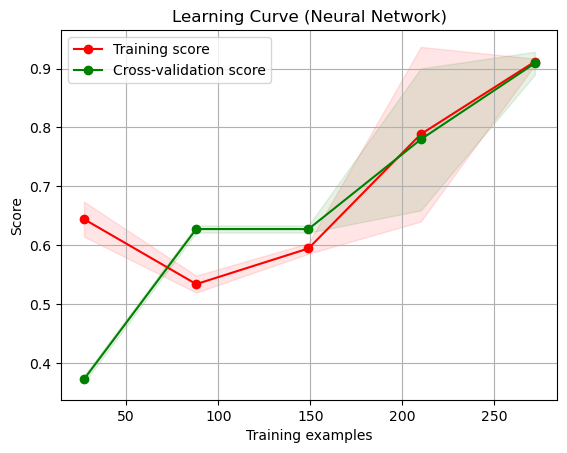

In [13]:
from sklearn.model_selection import learning_curve

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes,
        train_scores_mean,
        "o-",
        color="r",
        label="Training score",
    )
    plt.plot(
        train_sizes,
        test_scores_mean,
        "o-",
        color="g",
        label="Cross-validation score",
    )

    plt.legend(loc="best")
    return plt

# Define the title and plot the learning curve
title = "Learning Curve (Neural Network)"
cv = 5  # Cross-validation folds
train_sizes = np.linspace(0.1, 1.0, 5)
plot_learning_curve(mlp, title, x_train, y_train, cv, train_sizes)
plt.show()

Iteration 1, loss = 0.67439347
Iteration 2, loss = 0.67376938
Iteration 3, loss = 0.67301377
Iteration 4, loss = 0.67241606
Iteration 5, loss = 0.67184672
Iteration 6, loss = 0.67126020
Iteration 7, loss = 0.67064929
Iteration 8, loss = 0.67003266
Iteration 9, loss = 0.66948464
Iteration 10, loss = 0.66883139
Iteration 11, loss = 0.66834071
Iteration 12, loss = 0.66781445
Iteration 13, loss = 0.66726586
Iteration 14, loss = 0.66680278
Iteration 15, loss = 0.66628744
Iteration 16, loss = 0.66576031
Iteration 17, loss = 0.66534994
Iteration 18, loss = 0.66483694
Iteration 19, loss = 0.66440785
Iteration 20, loss = 0.66395417
Iteration 21, loss = 0.66353682
Iteration 22, loss = 0.66304480
Iteration 23, loss = 0.66274956
Iteration 24, loss = 0.66227856
Iteration 25, loss = 0.66191791
Iteration 26, loss = 0.66152238
Iteration 27, loss = 0.66116924
Iteration 28, loss = 0.66077340
Iteration 29, loss = 0.66043721
Iteration 30, loss = 0.66011931
Iteration 31, loss = 0.65983136
Iteration 32, los

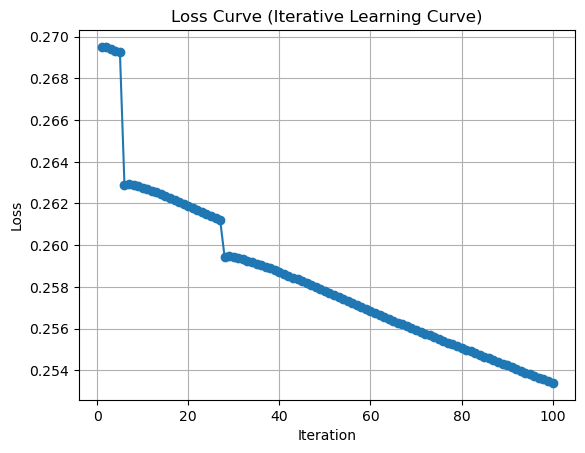

In [14]:
# Initialize and train the neural network while capturing the loss values
mlp = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, random_state=42, verbose=True, warm_start=True)
loss_values = []

for i in range(100):  # Train for 100 iterations
    mlp.fit(x_train, y_train)
    loss_values.append(mlp.loss_)

# Plot the loss curve
plt.figure()
plt.title("Loss Curve (Iterative Learning Curve)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(range(1, 101), loss_values, marker='o')
plt.grid()
plt.show()


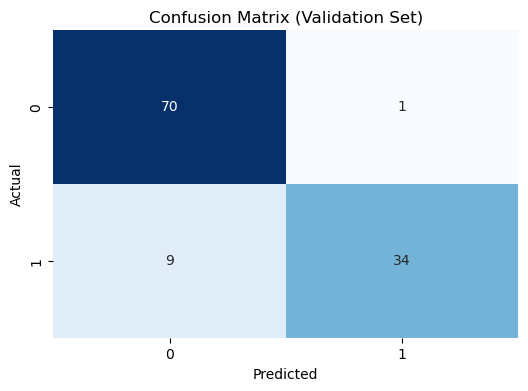

In [15]:

# Predict on the validation set
y_pred_valid = mlp.predict(x_valid)

# Create a confusion matrix
cm = confusion_matrix(y_valid, y_pred_valid)

# Plot the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

Iteration 1, loss = 0.73446340
Iteration 2, loss = 0.73338494
Iteration 3, loss = 0.73231323
Iteration 4, loss = 0.73124837
Iteration 5, loss = 0.73019044
Iteration 6, loss = 0.72913951
Iteration 7, loss = 0.72809566
Iteration 8, loss = 0.72705896
Iteration 9, loss = 0.72602946
Iteration 10, loss = 0.72500440
Iteration 11, loss = 0.72398511
Iteration 12, loss = 0.72297303
Iteration 13, loss = 0.72196435
Iteration 14, loss = 0.72096245
Iteration 15, loss = 0.71996781
Iteration 16, loss = 0.71898051
Iteration 17, loss = 0.71800063
Iteration 18, loss = 0.71702822
Iteration 19, loss = 0.71606229
Iteration 20, loss = 0.71510322
Iteration 21, loss = 0.71415359
Iteration 22, loss = 0.71320747
Iteration 23, loss = 0.71226908
Iteration 24, loss = 0.71133735
Iteration 25, loss = 0.71040896
Iteration 26, loss = 0.70948726
Iteration 27, loss = 0.70856830
Iteration 28, loss = 0.70765573
Iteration 29, loss = 0.70674581
Iteration 30, loss = 0.70584409
Iteration 31, loss = 0.70495660
Iteration 32, los

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 170, loss = 0.60887389
Iteration 171, loss = 0.60824608
Iteration 172, loss = 0.60754727
Iteration 173, loss = 0.60687291
Iteration 174, loss = 0.60615769
Iteration 175, loss = 0.60543249
Iteration 176, loss = 0.60477182
Iteration 177, loss = 0.60401711
Iteration 178, loss = 0.60328066
Iteration 179, loss = 0.60256318
Iteration 180, loss = 0.60179408
Iteration 181, loss = 0.60105032
Iteration 182, loss = 0.60028469
Iteration 183, loss = 0.59952283
Iteration 184, loss = 0.59875649
Iteration 185, loss = 0.59796601
Iteration 186, loss = 0.59717648
Iteration 187, loss = 0.59639331
Iteration 188, loss = 0.59557941
Iteration 189, loss = 0.59478640
Iteration 190, loss = 0.59394877
Iteration 191, loss = 0.59317882
Iteration 192, loss = 0.59232975
Iteration 193, loss = 0.59153462
Iteration 194, loss = 0.59070836
Iteration 195, loss = 0.58985977
Iteration 196, loss = 0.58904333
Iteration 197, loss = 0.58820203
Iteration 198, loss = 0.58738353
Iteration 199, loss = 0.58654077
Iteration 

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 162, loss = 0.65881922
Iteration 163, loss = 0.65865221
Iteration 164, loss = 0.65848644
Iteration 165, loss = 0.65832188
Iteration 166, loss = 0.65815854
Iteration 167, loss = 0.65799639
Iteration 168, loss = 0.65783542
Iteration 169, loss = 0.65767562
Iteration 170, loss = 0.65751698
Iteration 171, loss = 0.65735949
Iteration 172, loss = 0.65720313
Iteration 173, loss = 0.65704790
Iteration 174, loss = 0.65689377
Iteration 175, loss = 0.65674075
Iteration 176, loss = 0.65658882
Iteration 177, loss = 0.65643796
Iteration 178, loss = 0.65628817
Iteration 179, loss = 0.65613944
Iteration 180, loss = 0.65599176
Iteration 181, loss = 0.65584510
Iteration 182, loss = 0.65571186
Iteration 183, loss = 0.65559900
Iteration 184, loss = 0.65548889
Iteration 185, loss = 0.65538132
Iteration 186, loss = 0.65527609
Iteration 187, loss = 0.65517301
Iteration 188, loss = 0.65507193
Iteration 189, loss = 0.65497270
Iteration 190, loss = 0.65487519
Iteration 191, loss = 0.65477928
Iteration 

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 122, loss = 0.63392863
Iteration 123, loss = 0.63352149
Iteration 124, loss = 0.63312062
Iteration 125, loss = 0.63270233
Iteration 126, loss = 0.63230348
Iteration 127, loss = 0.63185828
Iteration 128, loss = 0.63141963
Iteration 129, loss = 0.63098257
Iteration 130, loss = 0.63052506
Iteration 131, loss = 0.63007041
Iteration 132, loss = 0.62959784
Iteration 133, loss = 0.62914472
Iteration 134, loss = 0.62865606
Iteration 135, loss = 0.62817860
Iteration 136, loss = 0.62769671
Iteration 137, loss = 0.62720654
Iteration 138, loss = 0.62669824
Iteration 139, loss = 0.62619184
Iteration 140, loss = 0.62569355
Iteration 141, loss = 0.62516078
Iteration 142, loss = 0.62463657
Iteration 143, loss = 0.62412265
Iteration 144, loss = 0.62357560
Iteration 145, loss = 0.62302842
Iteration 146, loss = 0.62249677
Iteration 147, loss = 0.62192994
Iteration 148, loss = 0.62137880
Iteration 149, loss = 0.62079271
Iteration 150, loss = 0.62021235
Iteration 151, loss = 0.61962485
Iteration 

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 143, loss = 0.66224415
Iteration 144, loss = 0.66205116
Iteration 145, loss = 0.66185966
Iteration 146, loss = 0.66166965
Iteration 147, loss = 0.66148111
Iteration 148, loss = 0.66129402
Iteration 149, loss = 0.66110837
Iteration 150, loss = 0.66092414
Iteration 151, loss = 0.66074132
Iteration 152, loss = 0.66055989
Iteration 153, loss = 0.66037984
Iteration 154, loss = 0.66020116
Iteration 155, loss = 0.66002383
Iteration 156, loss = 0.65984784
Iteration 157, loss = 0.65967317
Iteration 158, loss = 0.65949981
Iteration 159, loss = 0.65932775
Iteration 160, loss = 0.65915697
Iteration 161, loss = 0.65898746
Iteration 162, loss = 0.65881922
Iteration 163, loss = 0.65865221
Iteration 164, loss = 0.65848644
Iteration 165, loss = 0.65832188
Iteration 166, loss = 0.65815854
Iteration 167, loss = 0.65799639
Iteration 168, loss = 0.65783542
Iteration 169, loss = 0.65767562
Iteration 170, loss = 0.65751698
Iteration 171, loss = 0.65735949
Iteration 172, loss = 0.65720313
Iteration 

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 147, loss = 0.62237328
Iteration 148, loss = 0.62179809
Iteration 149, loss = 0.62121407
Iteration 150, loss = 0.62063710
Iteration 151, loss = 0.62003317
Iteration 152, loss = 0.61941900
Iteration 153, loss = 0.61881311
Iteration 154, loss = 0.61820204
Iteration 155, loss = 0.61763856
Iteration 156, loss = 0.61700710
Iteration 157, loss = 0.61634552
Iteration 158, loss = 0.61572161
Iteration 159, loss = 0.61506881
Iteration 160, loss = 0.61443469
Iteration 161, loss = 0.61376198
Iteration 162, loss = 0.61311234
Iteration 163, loss = 0.61242659
Iteration 164, loss = 0.61175402
Iteration 165, loss = 0.61108239
Iteration 166, loss = 0.61036306
Iteration 167, loss = 0.60971142
Iteration 168, loss = 0.60897665
Iteration 169, loss = 0.60828636
Iteration 170, loss = 0.60756945
Iteration 171, loss = 0.60685691
Iteration 172, loss = 0.60611823
Iteration 173, loss = 0.60538167
Iteration 174, loss = 0.60466761
Iteration 175, loss = 0.60392083
Iteration 176, loss = 0.60315901
Iteration 

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.69267880
Iteration 9, loss = 0.69255020
Iteration 10, loss = 0.69242374
Iteration 11, loss = 0.69230115
Iteration 12, loss = 0.69218179
Iteration 13, loss = 0.69206085
Iteration 14, loss = 0.69194147
Iteration 15, loss = 0.69181952
Iteration 16, loss = 0.69169982
Iteration 17, loss = 0.69158230
Iteration 18, loss = 0.69146382
Iteration 19, loss = 0.69134635
Iteration 20, loss = 0.69122819
Iteration 21, loss = 0.69110533
Iteration 22, loss = 0.69097808
Iteration 23, loss = 0.69084999
Iteration 24, loss = 0.69072234
Iteration 25, loss = 0.69059449
Iteration 26, loss = 0.69046233
Iteration 27, loss = 0.69033031
Iteration 28, loss = 0.69020061
Iteration 29, loss = 0.69007379
Iteration 30, loss = 0.68994957
Iteration 31, loss = 0.68982149
Iteration 32, loss = 0.68969413
Iteration 33, loss = 0.68957226
Iteration 34, loss = 0.68945320
Iteration 35, loss = 0.68933487
Iteration 36, loss = 0.68921678
Iteration 37, loss = 0.68910043
Iteration 38, loss = 0.68898466
Iteration 

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


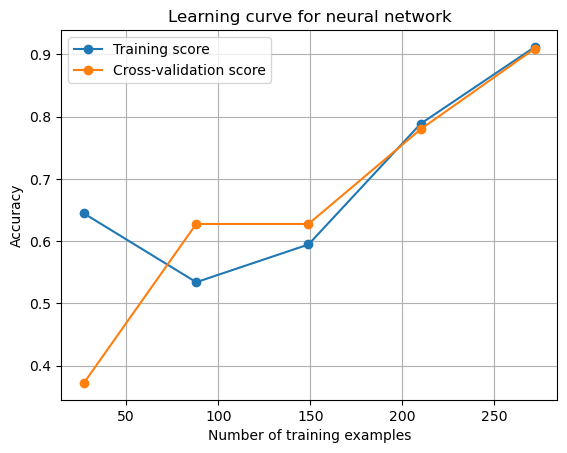

In [16]:
train_sizes, train_scores, valid_scores = learning_curve(
    mlp, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy')

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for neural network')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and 

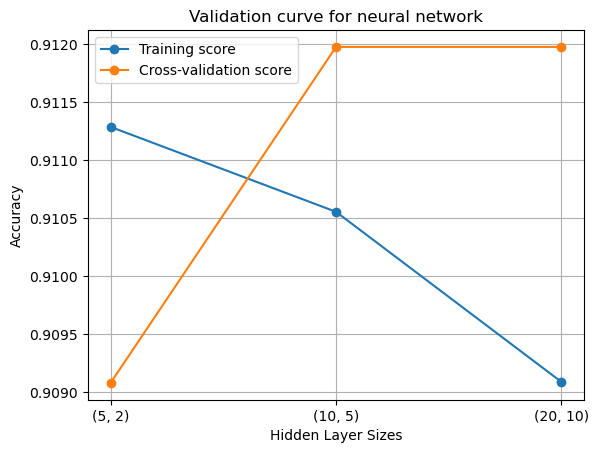

In [17]:
param_range = [(5, 2), (10, 5), (20, 10)]  # Vary hidden layer sizes
train_scores, valid_scores = validation_curve(
    MLPClassifier(max_iter=1000, random_state=42), x_train, y_train,
    param_name="hidden_layer_sizes", param_range=param_range, cv=5, scoring='accuracy')

plt.figure()
plt.xticks(range(len(param_range)), param_range)
plt.plot(range(len(param_range)), np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(range(len(param_range)), np.mean(valid_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Validation curve for neural network')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [18]:
start_time = time.time()
mlp.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time

print(f"Training time for neural network: {training_time:.2f} seconds")

Iteration 1, loss = 0.25330075
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training time for neural network: 0.00 seconds


/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and 

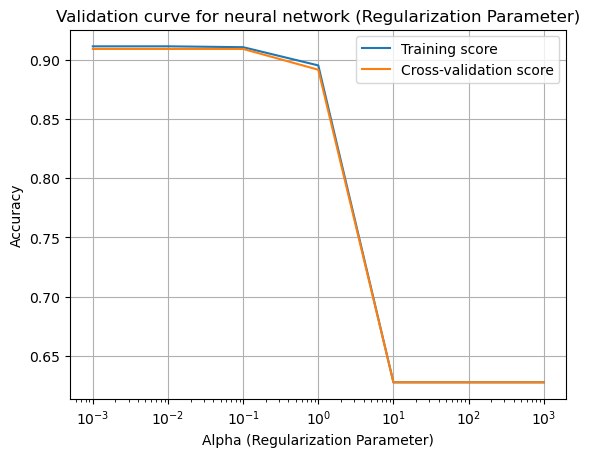

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and 

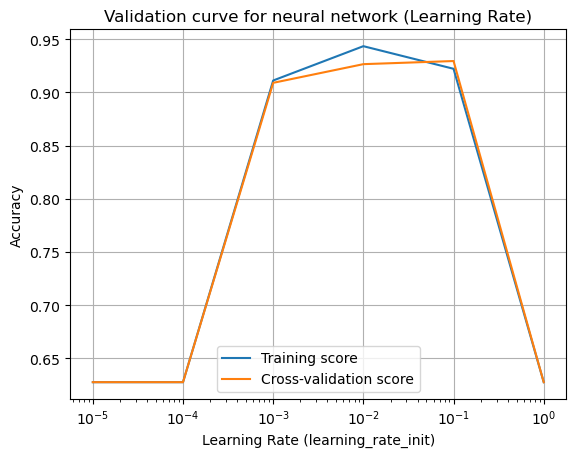

In [19]:
# Regularization parameter (alpha) validation curve
alpha_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(
    MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, random_state=42),
    x_train, y_train, param_name="alpha", param_range=alpha_range, cv=5, scoring='accuracy')

plt.figure()
plt.semilogx(alpha_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(alpha_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for neural network (Regularization Parameter)')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

# Learning rate (learning_rate_init) validation curve
lr_range = np.logspace(-5, 0, 6)
train_scores, test_scores = validation_curve(
    MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, random_state=42),
    x_train, y_train, param_name="learning_rate_init", param_range=lr_range, cv=5, scoring='accuracy')

plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for neural network (Learning Rate)')
plt.xlabel('Learning Rate (learning_rate_init)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

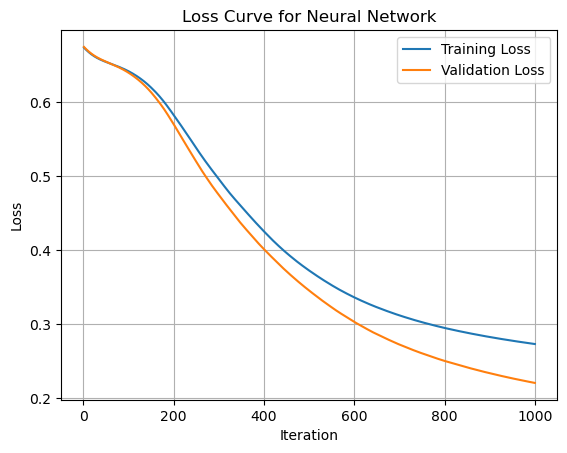

In [20]:
# Define your MLPClassifier with appropriate hyperparameters
mlp = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, random_state=42)

# Initialize lists to store training and validation losses
training_loss = []
validation_loss = []

# Training loop
for iteration in range(1, mlp.max_iter + 1):
    mlp.partial_fit(x_train, y_train, classes=np.unique(y_train))
    
    # Calculate training loss
    train_loss = -np.mean(np.log(mlp.predict_proba(x_train)[range(len(y_train)), y_train]))
    training_loss.append(train_loss)
    
    # Calculate validation loss
    valid_loss = -np.mean(np.log(mlp.predict_proba(x_valid)[range(len(y_valid)), y_valid]))
    validation_loss.append(valid_loss)

# Plot the loss curve
plt.figure()
plt.plot(range(1, mlp.max_iter + 1), training_loss, label='Training Loss')
plt.plot(range(1, mlp.max_iter + 1), validation_loss, label='Validation Loss')
plt.title('Loss Curve for Neural Network')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()
plt.show()

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and 

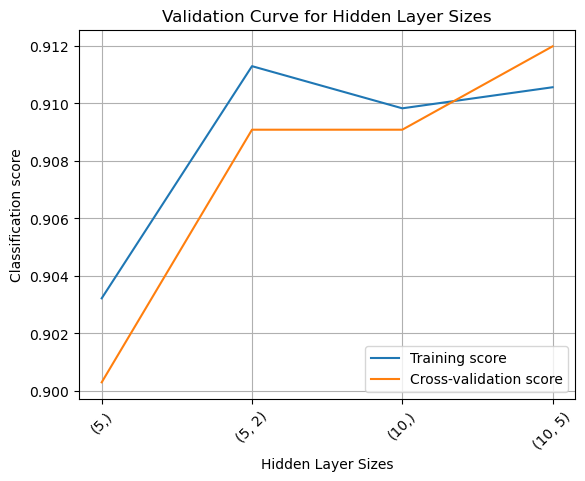

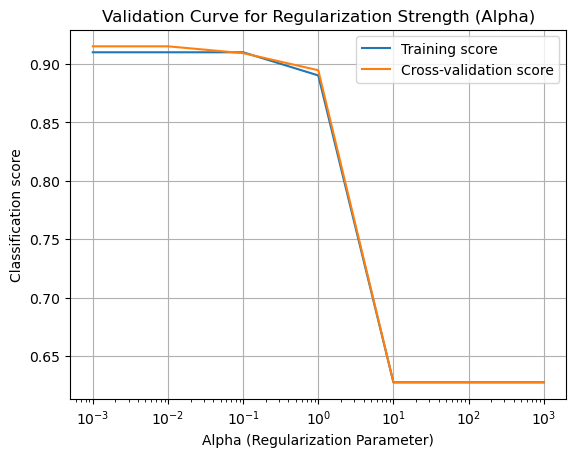

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and 

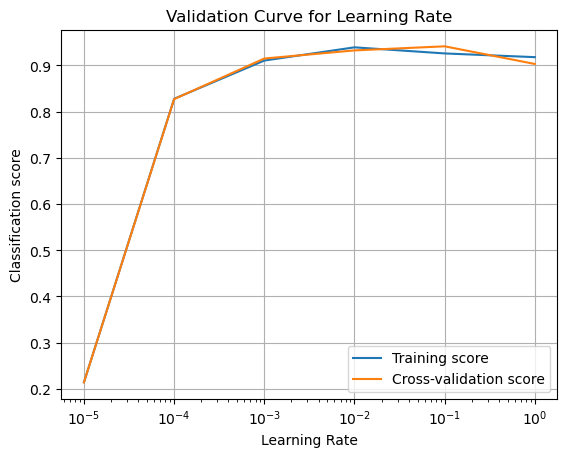

In [24]:
# Define your MLPClassifier with default hyperparameters
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Hyperparameter tuning for hidden layer sizes (width, depth)
hidden_layer_sizes_range = [(5,), (5, 2), (10,), (10, 5)]
param_name = "hidden_layer_sizes"
param_range = hidden_layer_sizes_range

train_scores, test_scores = validation_curve(mlp, x_train, y_train, param_name=param_name, param_range=param_range, cv=5)

# Plot the validation curve for hidden layer sizes
plt.figure()
plt.plot(range(len(param_range)), np.mean(train_scores, axis=1), label='Training score')
plt.plot(range(len(param_range)), np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Hidden Layer Sizes')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel("Classification score")
plt.xticks(range(len(param_range)), param_range, rotation=45)
plt.legend(loc="best")
plt.grid()
plt.show()

# Hyperparameter tuning for regularization strength (alpha)
alpha_range = np.logspace(-3, 3, 7)
param_name = "alpha"
param_range = alpha_range

train_scores, test_scores = validation_curve(mlp, x_train, y_train, param_name=param_name, param_range=param_range, cv=5)

# Plot the validation curve for regularization strength (alpha)
plt.figure()
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Regularization Strength (Alpha)')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Hyperparameter tuning for learning rate
learning_rate_range = np.logspace(-5, 0, 6)
param_name = "learning_rate_init"
param_range = learning_rate_range

train_scores, test_scores = validation_curve(mlp, x_train, y_train, param_name=param_name, param_range=param_range, cv=5)

# Plot the validation curve for learning rate
plt.figure()
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [21]:
#hyperparameter tuning

In [22]:
# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(5, 2), (10, 5), (20, 10)],
    'alpha': [0.001, 0.01, 0.1],
}

# Create an MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best classifier and hyperparameters
best_mlp = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and 

Best Hyperparameters: {'alpha': 0.001, 'hidden_layer_sizes': (10, 5)}


In [23]:
# Initialize and train the neural network with the best hyperparameters
best_mlp = MLPClassifier(hidden_layer_sizes=(10, 5), alpha=0.001, max_iter=1000, random_state=42)
best_mlp.fit(x_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(10, 5), max_iter=1000,
              random_state=42)

In [24]:
# Predict on the validation set
y_pred_valid = best_mlp.predict(x_valid)

# Calculate evaluation metrics
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
precision_valid = precision_score(y_valid, y_pred_valid)
recall_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

# Print the evaluation metrics for the validation set
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy_valid:.2f}")
print(f"Precision: {precision_valid:.2f}")
print(f"Recall: {recall_valid:.2f}")
print(f"F1 Score: {f1_valid:.2f}")

Validation Set Metrics:
Accuracy: 0.92
Precision: 1.00
Recall: 0.79
F1 Score: 0.88


/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


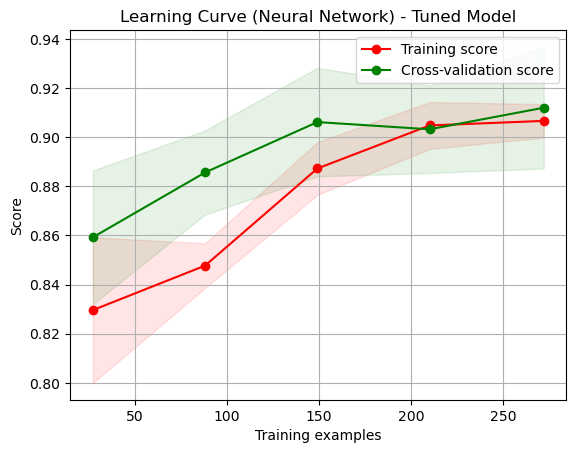

In [25]:
# Create a function to plot the learning curve for the tuned model
def plot_learning_curve_tuned(estimator, title, X, y, cv, train_sizes):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes,
        train_scores_mean,
        "o-",
        color="r",
        label="Training score",
    )
    plt.plot(
        train_sizes,
        test_scores_mean,
        "o-",
        color="g",
        label="Cross-validation score",
    )

    plt.legend(loc="best")
    return plt

# Define the title and plot the learning curve for the tuned model
title = "Learning Curve (Neural Network) - Tuned Model"
plot_learning_curve_tuned(best_mlp, title, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))
plt.show()

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and 

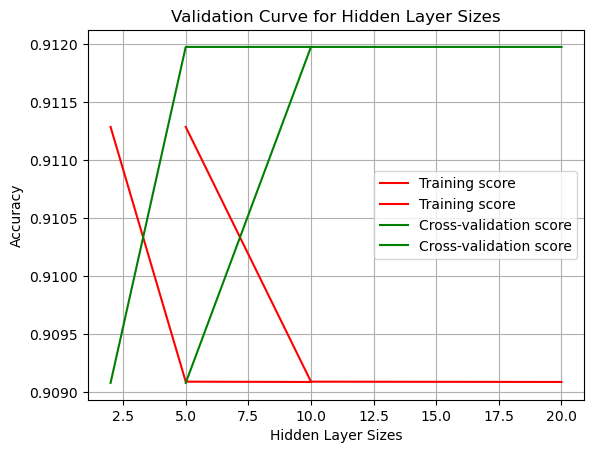

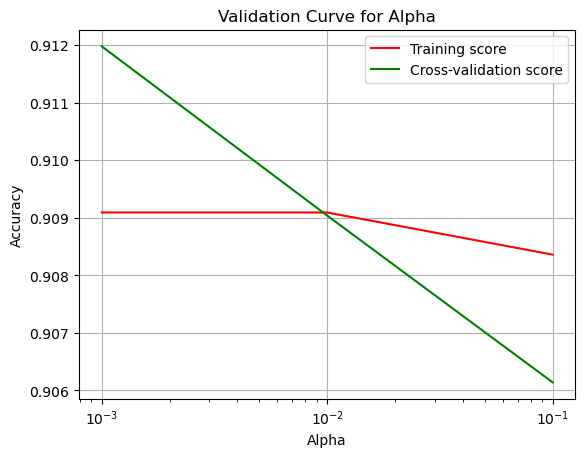

In [26]:
# Define the hyperparameter ranges to explore
param_range_hidden_layers = [(5, 2), (10, 5), (20, 10)]
param_range_alpha = [0.001, 0.01, 0.1]

# Create validation curves for hidden layer sizes
plt.figure()
plt.title("Validation Curve for Hidden Layer Sizes")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Accuracy")
train_scores, test_scores = validation_curve(
    MLPClassifier(alpha=best_params['alpha'], max_iter=1000, random_state=42),
    x_train, y_train, param_name="hidden_layer_sizes", param_range=param_range_hidden_layers, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(param_range_hidden_layers, train_scores_mean, label="Training score", color="r")
plt.plot(param_range_hidden_layers, test_scores_mean, label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.grid()
plt.show()

# Create validation curves for alpha
plt.figure()
plt.title("Validation Curve for Alpha")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
train_scores, test_scores = validation_curve(
    MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'], max_iter=1000, random_state=42),
    x_train, y_train, param_name="alpha", param_range=param_range_alpha, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.semilogx(param_range_alpha, train_scores_mean, label="Training score", color="r")
plt.semilogx(param_range_alpha, test_scores_mean, label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.grid()
plt.show()

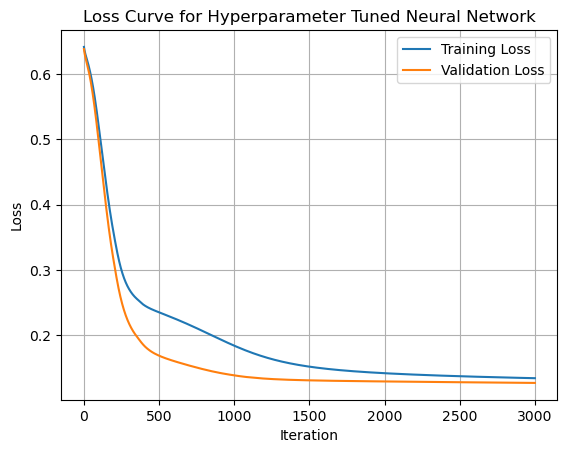

In [28]:
# Define your MLPClassifier with the best hyperparameters
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), alpha=0.001, max_iter=3000, random_state=42)

# Initialize lists to store training and validation losses
training_loss = []
validation_loss = []

# Training loop
for iteration in range(1, mlp.max_iter + 1):
    mlp.partial_fit(x_train, y_train, classes=np.unique(y_train))
    
    # Calculate training loss
    train_loss = -np.mean(np.log(mlp.predict_proba(x_train)[range(len(y_train)), y_train]))
    training_loss.append(train_loss)
    
    # Calculate validation loss
    valid_loss = -np.mean(np.log(mlp.predict_proba(x_valid)[range(len(y_valid)), y_valid]))
    validation_loss.append(valid_loss)

# Plot the loss curve
plt.figure()
plt.plot(range(1, mlp.max_iter + 1), training_loss, label='Training Loss')
plt.plot(range(1, mlp.max_iter + 1), validation_loss, label='Validation Loss')
plt.title('Loss Curve for Hyperparameter Tuned Neural Network')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()
plt.show()

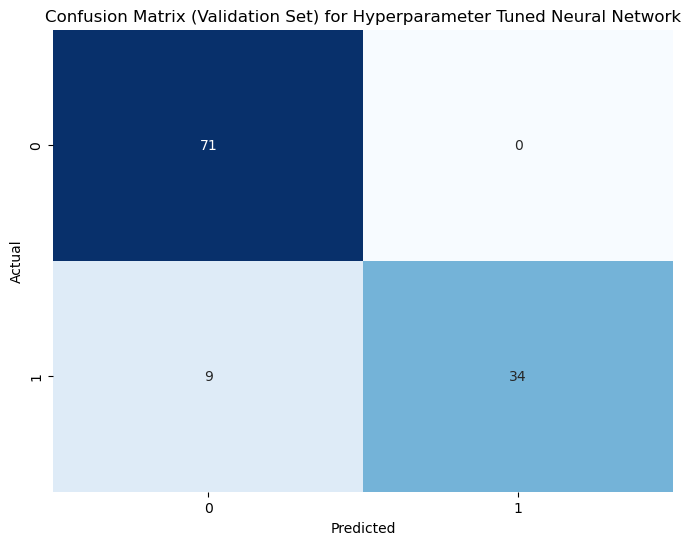

In [29]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred_valid)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation Set) for Hyperparameter Tuned Neural Network")
plt.show()

Test Set Metrics:
Accuracy: 0.93
Precision: 0.97
Recall: 0.83
F1 Score: 0.90


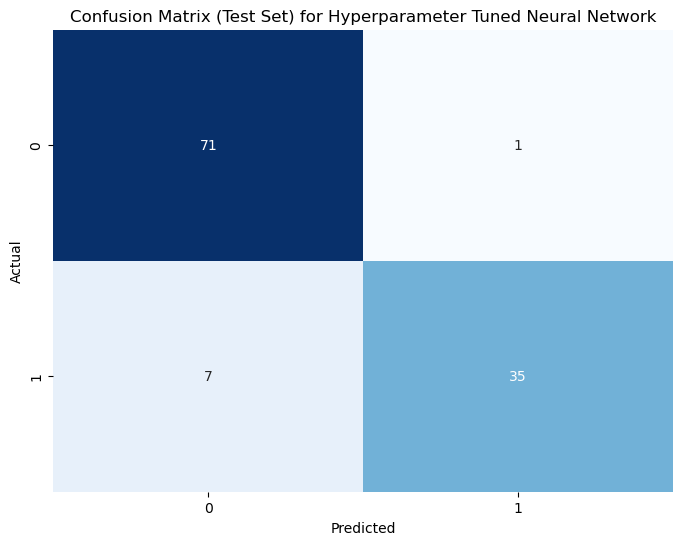

In [30]:
# Train the neural network with the best hyperparameters on the entire training set
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), alpha=0.001, max_iter=3000, random_state=42)
mlp.fit(x_train, y_train)

# Predict on the test set
y_pred_test = mlp.predict(x_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print("Test Set Metrics:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")

# Create a confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set) for Hyperparameter Tuned Neural Network")
plt.show()

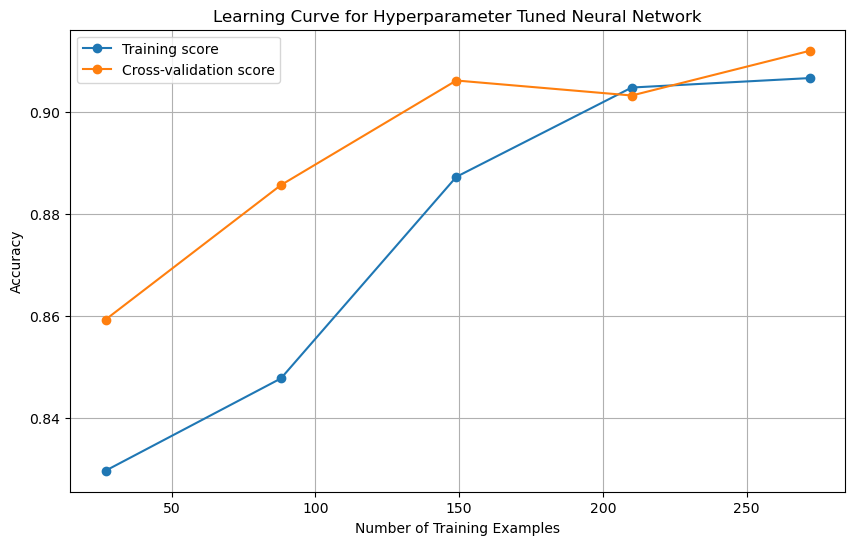

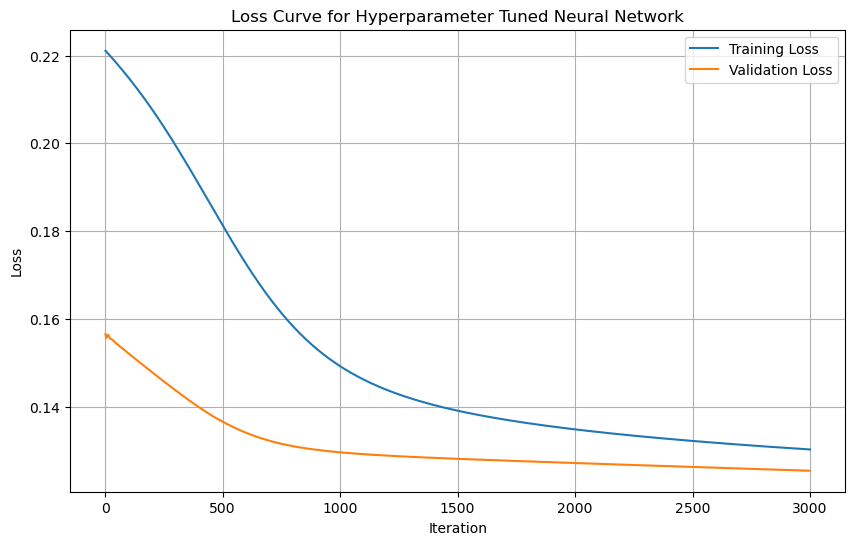

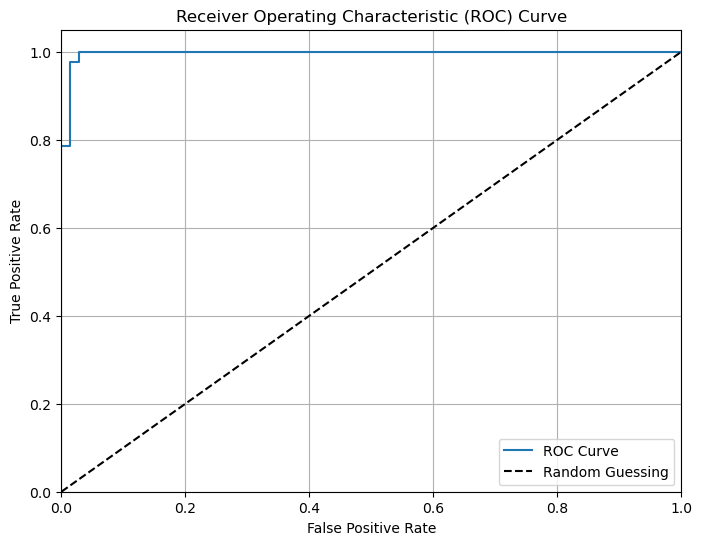

ROC AUC Score: 1.00


In [32]:
# Training curves
train_sizes, train_scores, valid_scores = learning_curve(
    mlp, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Hyperparameter Tuned Neural Network')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

# Loss curve
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), alpha=0.001, max_iter=3000, random_state=42)
mlp.fit(x_train, y_train)

training_loss = []
validation_loss = []

for iteration in range(1, mlp.max_iter + 1):
    mlp.partial_fit(x_train, y_train, classes=np.unique(y_train))
    
    train_loss = -np.mean(np.log(mlp.predict_proba(x_train)[range(len(y_train)), y_train]))
    training_loss.append(train_loss)
    
    valid_loss = -np.mean(np.log(mlp.predict_proba(x_valid)[range(len(y_valid)), y_valid]))
    validation_loss.append(valid_loss)

plt.figure(figsize=(10, 6))
plt.plot(range(1, mlp.max_iter + 1), training_loss, label='Training Loss')
plt.plot(range(1, mlp.max_iter + 1), validation_loss, label='Validation Loss')
plt.title('Loss Curve for Hyperparameter Tuned Neural Network')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()
plt.show()

# ROC Curve and ROC AUC Score
y_scores = mlp.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

roc_auc = roc_auc_score(y_test, y_scores)
print(f"ROC AUC Score: {roc_auc:.2f}")

In [33]:
#boosting

In [58]:
# Initialize a decision tree stump (weak learner)
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)

In [59]:
# Define your range of hyperparameter values (Number of weak learners, n_estimators)
num_learners_range = np.arange(1, 101, 10)

In [60]:
# Create an AdaBoost classifier with the decision tree stump as the base estimator
clf_boosted = AdaBoostClassifier(estimator=dt_stump, random_state=42)

In [61]:
# Fit the AdaBoostClassifier on the training set
clf_boosted.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [62]:
# Predict on the validation set
y_pred_valid = clf_boosted.predict(x_valid)

In [77]:
# Calculate the accuracy of Adaboost without hyperparameter tuning on the validation set
boosted_accuracy = accuracy_score(y_valid, y_pred_valid)
print('Accuracy of Adaboost without hyperparameter tuning on the validation set: %.2f%%' % (boosted_accuracy * 100))

Accuracy of Adaboost without hyperparameter tuning on the validation set: 95.61%


In [78]:
# Calculate validation curve scores
train_scores, test_scores = validation_curve(
    clf_boosted, x_train, y_train, param_name="n_estimators", param_range=num_learners_range, cv=5)

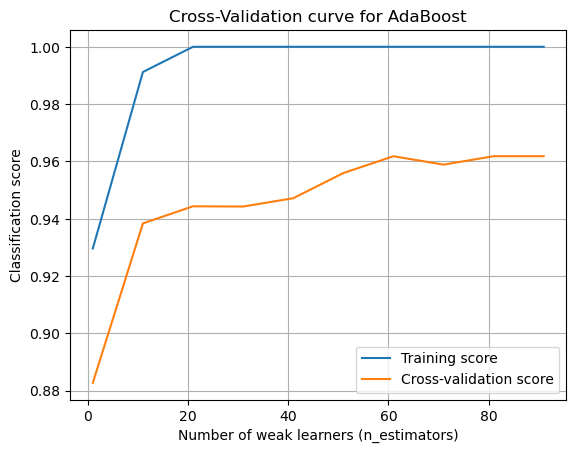

In [79]:
# Plot the validation curve
plt.figure()
plt.plot(num_learners_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(num_learners_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Cross-Validation curve for AdaBoost')
plt.xlabel('Number of weak learners (n_estimators)')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [80]:
# Learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    clf_boosted, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy')

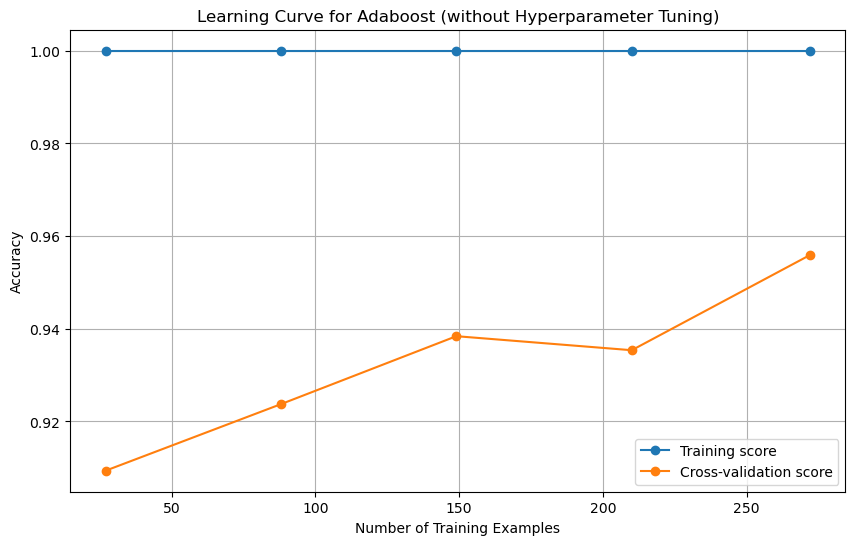

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Adaboost (without Hyperparameter Tuning)')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

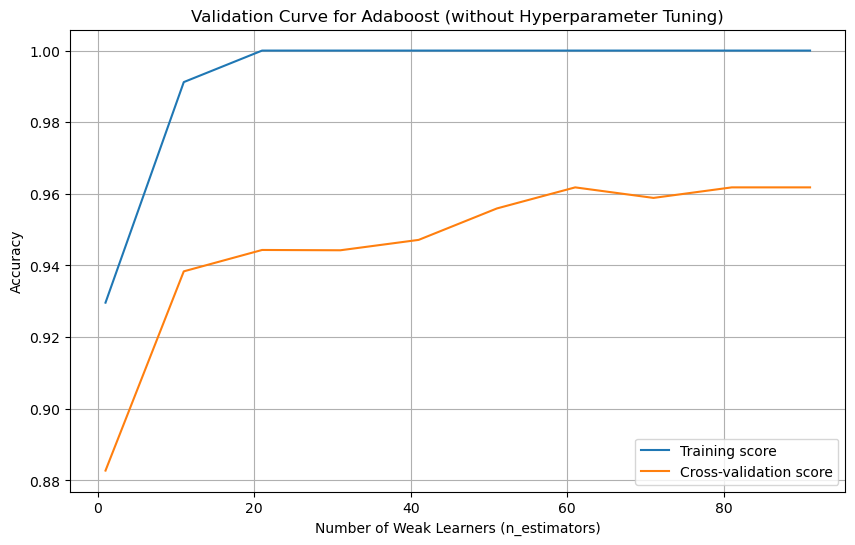

/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:637: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:637: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/Users/yrizvi/miniconda3/envs/assignment-env/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: Sample weights have reached infinite values, at iteration 0, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/Users/yrizvi/miniconda3/envs/assignment-env/lib/p

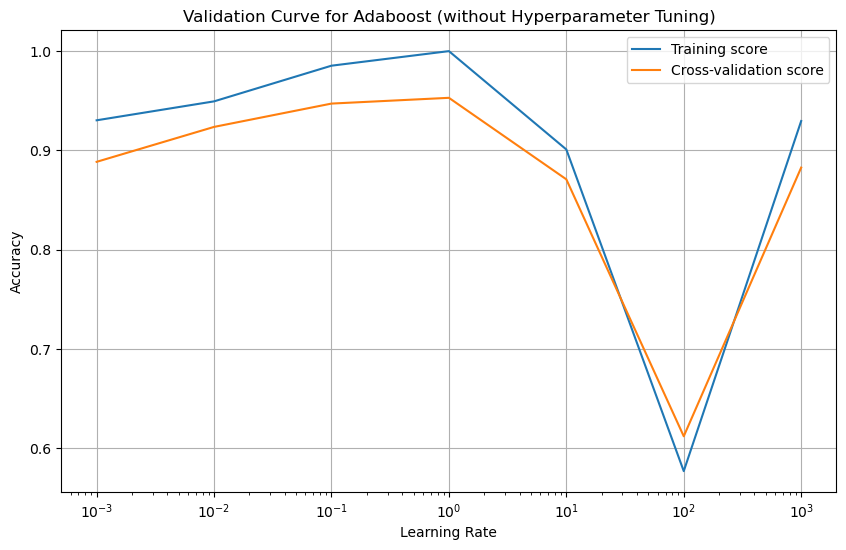

In [82]:
# Validation curve on hyperparameter 1 (n_estimators)
n_estimators_range = np.arange(1, 101, 10)
train_scores, valid_scores = validation_curve(
    clf_boosted, x_train, y_train, param_name="n_estimators", param_range=n_estimators_range, cv=5)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(n_estimators_range, np.mean(valid_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Adaboost (without Hyperparameter Tuning)')
plt.xlabel('Number of Weak Learners (n_estimators)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()
# Validation curve on hyperparameter 2 (learning_rate)
learning_rate_range = np.logspace(-3, 3, 7)
train_scores, valid_scores = validation_curve(
    clf_boosted, x_train, y_train, param_name="learning_rate", param_range=learning_rate_range, cv=5)

plt.figure(figsize=(10, 6))
plt.semilogx(learning_rate_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(learning_rate_range, np.mean(valid_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Adaboost (without Hyperparameter Tuning)')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import time

# Measure training time
start_time = time.time()

# Fit the AdaBoostClassifier on the training set
clf_boosted.fit(x_train, y_train)

# Calculate training time
completed_training_time_validation = time.time() - start_time

# Predict on the validation set
y_pred_valid = clf_boosted.predict(x_valid)

# Calculate precision, recall, and F1-score on the validation set
precision_valid = precision_score(y_valid, y_pred_valid)
recall_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

# Print performance metrics
print("Validation Set Metrics:")
print(f"Accuracy: {boosted_accuracy:.2f}")
print(f"Precision: {precision_valid:.2f}")
print(f"Recall: {recall_valid:.2f}")
print(f"F1 Score: {f1_valid:.2f}")
print(f"Training Time (Validation): {completed_training_time_validation:.2f} seconds")

# Calculate and print the confusion matrix
cm_valid = confusion_matrix(y_valid, y_pred_valid)
print("Confusion Matrix (Validation):\n", cm_valid)

Validation Set Metrics:
Accuracy: 0.96
Precision: 1.00
Recall: 0.88
F1 Score: 0.94
Training Time (Validation): 0.11 seconds
Confusion Matrix (Validation):
 [[71  0]
 [ 5 38]]


In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

# Define hyperparameters and their ranges
param_grid = {
    'n_estimators': [50, 100, 150],  # Adjust the values as needed
    'learning_rate': [0.01, 0.1, 1.0],  # Adjust the values as needed
}

# Create an AdaBoostClassifier with a base estimator
base_estimator = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
clf_boosted = AdaBoostClassifier(estimator=base_estimator, random_state=42)  # Updated parameter name

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(clf_boosted, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_valid, y_valid)

# Retrieve the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred_valid = best_model.predict(x_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
precision_valid = precision_score(y_valid, y_pred_valid)
recall_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy_valid:.2f}")
print(f"Precision: {precision_valid:.2f}")
print(f"Recall: {recall_valid:.2f}")
print(f"F1 Score: {f1_valid:.2f}")

# You can also print the best hyperparameters using best_params
print("Best Hyperparameters:", best_params)

Validation Set Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [134]:
import time
from sklearn.metrics import accuracy_score

# Define the AdaBoostClassifier with the best hyperparameters
best_params = {'n_estimators': 150, 'learning_rate': 1.0}  # Replace with your best hyperparameters
best_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),
                                **best_params, random_state=42)

# Measure the training time
start_time = time.time()
best_model.fit(x_train, y_train)
training_time = time.time() - start_time

# Measure the inference time on the validation data
start_time = time.time()
y_pred_valid = best_model.predict(x_valid)
inference_time_valid = time.time() - start_time

# Calculate accuracy on the validation data
accuracy_valid = accuracy_score(y_valid, y_pred_valid)

# Print the results
print("Completed training time: {:.2f} seconds".format(training_time))
print("Inference time on validation data: {:.2f} seconds".format(inference_time_valid))
print("Accuracy with the best hyperparameters: {:.2f}%".format(accuracy_valid * 100))

Completed training time: 0.32 seconds
Inference time on validation data: 0.03 seconds
Accuracy with the best hyperparameters: 97.37%


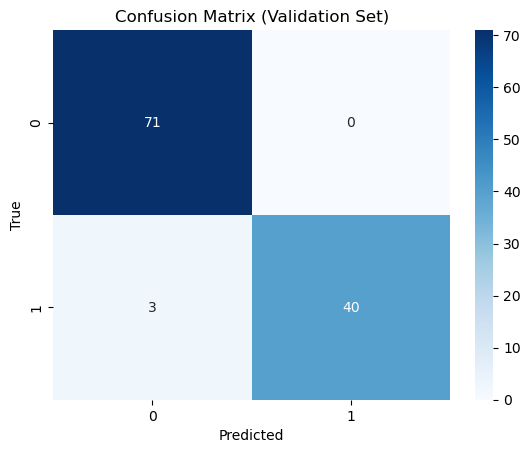

In [135]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_valid = best_model.predict(x_valid)

cm = confusion_matrix(y_valid, y_pred_valid)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

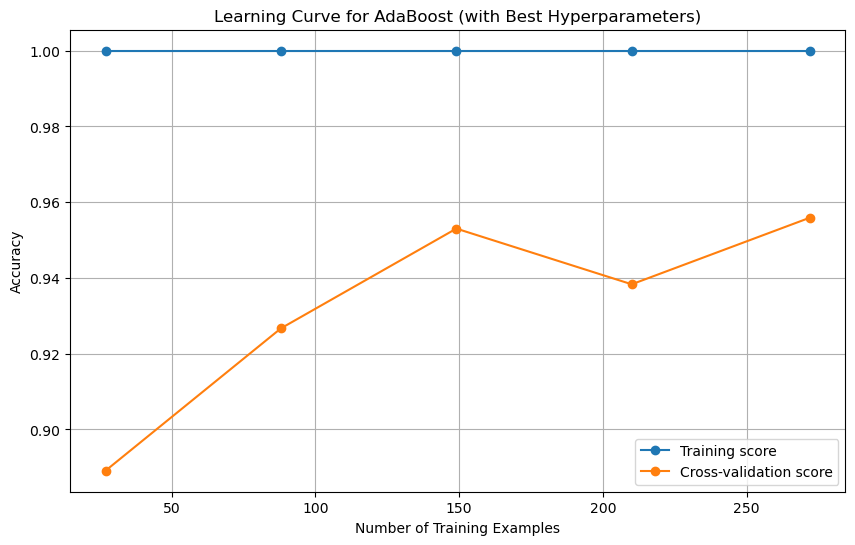

In [136]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    best_model, x_train, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for AdaBoost (with Best Hyperparameters)')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [137]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.98550725 0.92647059 0.97058824 0.98529412 0.91176471]
Mean Accuracy: 0.9559249786871271


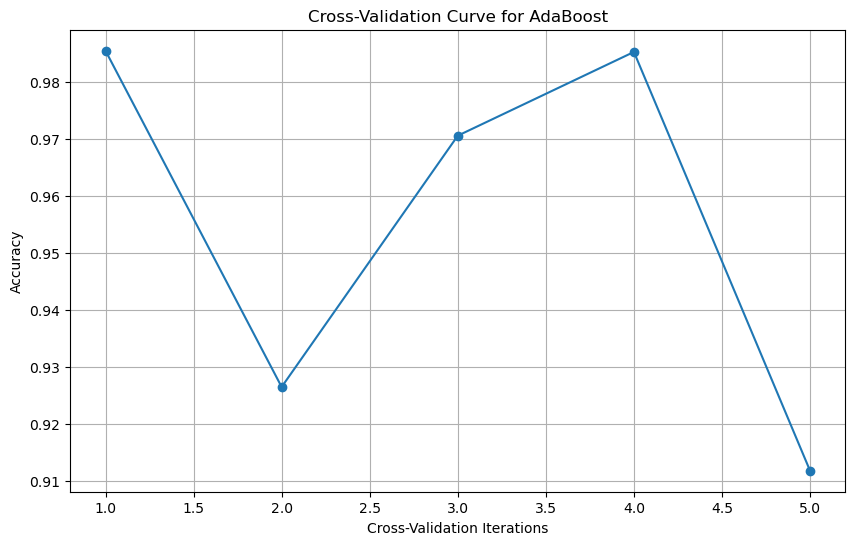

In [138]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores
scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='accuracy')

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, 'o-')
plt.title('Cross-Validation Curve for AdaBoost')
plt.xlabel('Cross-Validation Iterations')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

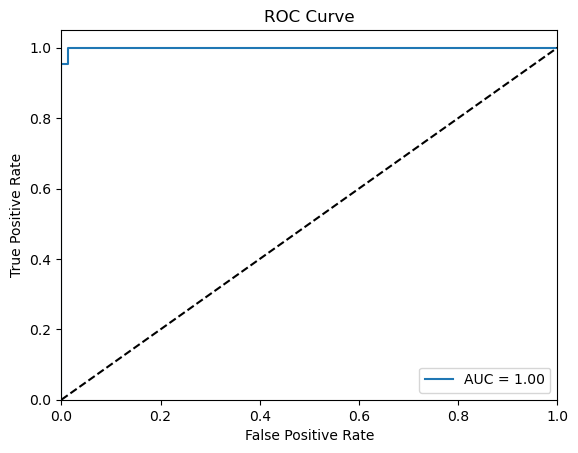

In [139]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = best_model.predict_proba(x_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_probs)
auc = roc_auc_score(y_valid, y_probs)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

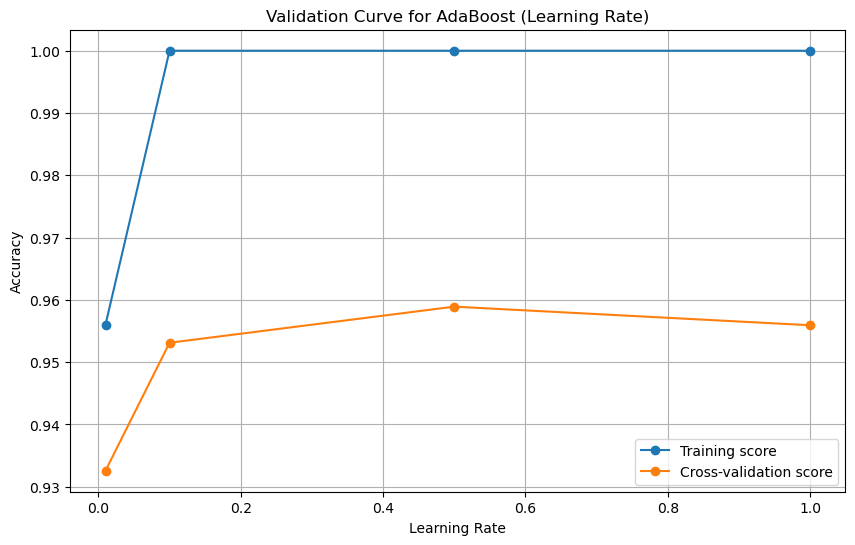

In [140]:
from sklearn.model_selection import validation_curve

# Define the learning rate values to test
learning_rate_range = [0.01, 0.1, 0.5, 1.0]

# Calculate validation curve for learning rate
train_scores, test_scores = validation_curve(
    best_model, x_train, y_train, param_name='learning_rate', param_range=learning_rate_range, cv=5, scoring='accuracy')

# Plot the validation curve for learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_range, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(learning_rate_range, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Validation Curve for AdaBoost (Learning Rate)')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

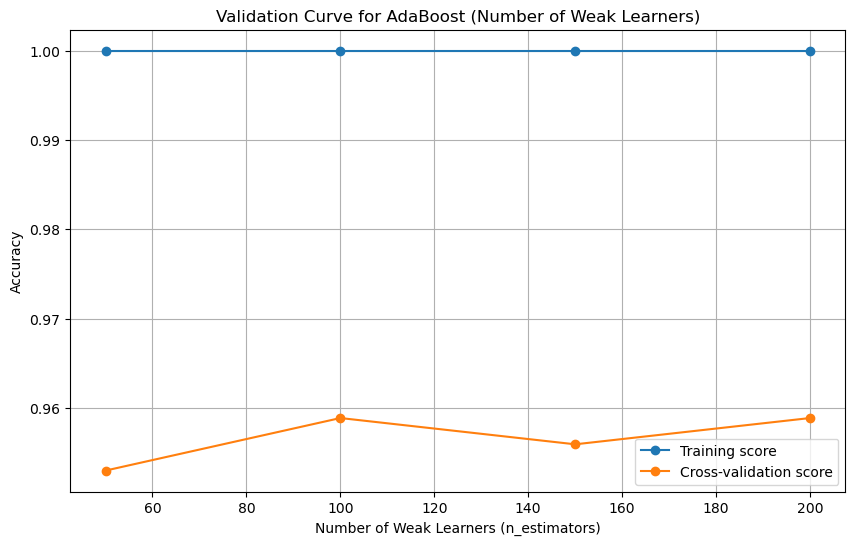

In [141]:
from sklearn.model_selection import validation_curve

# Define the number of weak learners (n_estimators) values to test
n_estimators_range = [50, 100, 150, 200]

# Calculate validation curve for n_estimators
train_scores, test_scores = validation_curve(
    best_model, x_train, y_train, param_name='n_estimators', param_range=n_estimators_range, cv=5, scoring='accuracy')

# Plot the validation curve for n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(n_estimators_range, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Validation Curve for AdaBoost (Number of Weak Learners)')
plt.xlabel('Number of Weak Learners (n_estimators)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

Test Set Metrics:
Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1 Score: 0.96
ROC AUC: 0.99


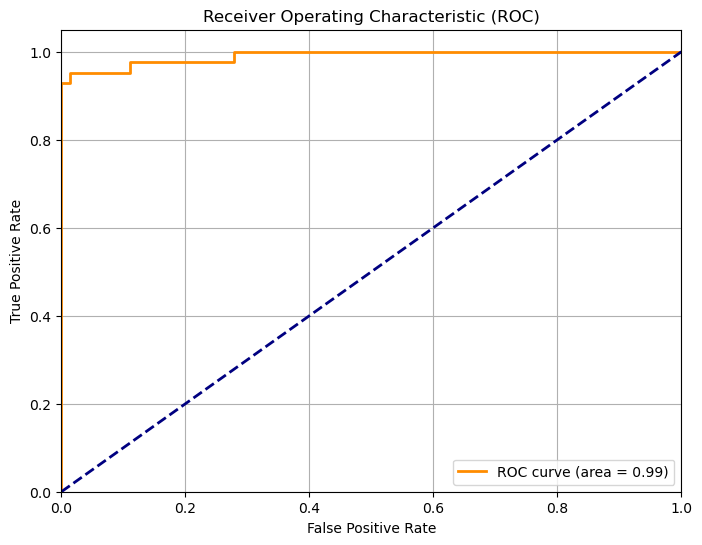

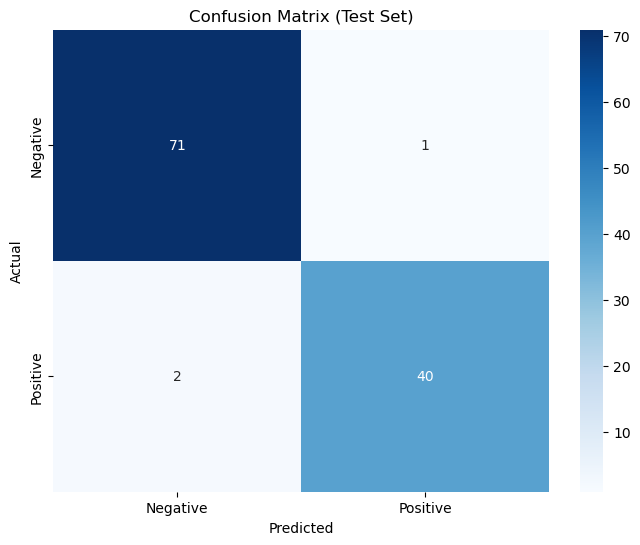

In [142]:
#train and test on the final hyper parameter tuned model:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and train the AdaBoost model with the best hyperparameters
best_model.fit(x_train, y_train)  # Use your training data here

# Predict on the test set
y_pred_test = best_model.predict(x_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Calculate ROC curve and AUC
y_prob_test = best_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = roc_auc_score(y_test, y_prob_test)

# Print the evaluation metrics
print("Test Set Metrics:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [143]:
import time

start_time = time.time()
best_model.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time

print(f"Training Time: {training_time:.2f} seconds")


Training Time: 0.32 seconds


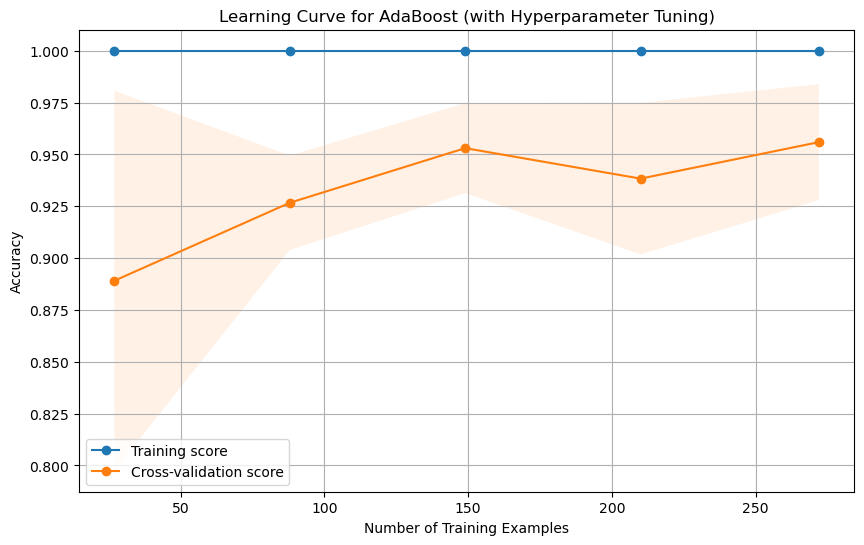

In [144]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define your AdaBoost model with the best hyperparameters
best_model = AdaBoostClassifier(learning_rate=1.0, n_estimators=150, random_state=42)

# Create a learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    best_model, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy')

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, valid_scores_mean, 'o-', label='Cross-validation score')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1)
plt.title('Learning Curve for AdaBoost (with Hyperparameter Tuning)')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

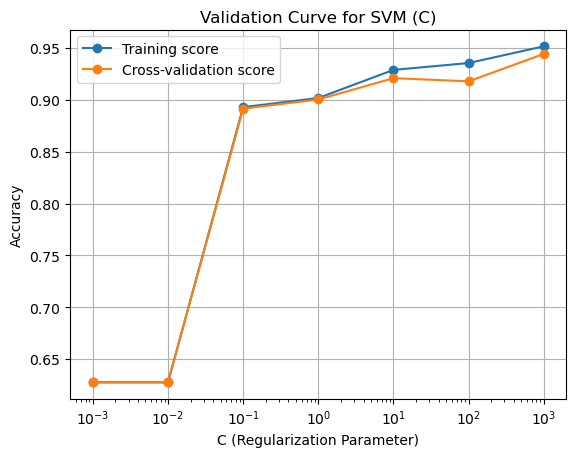

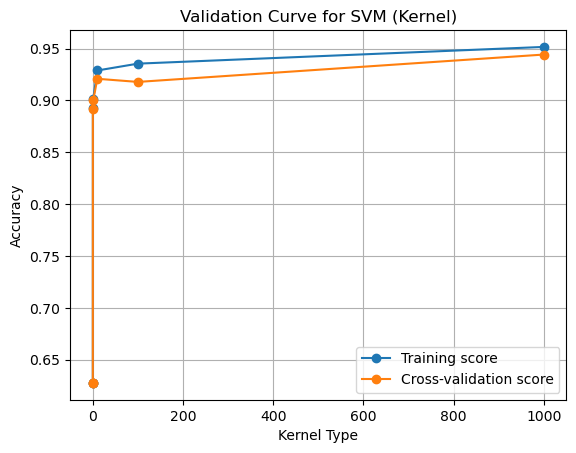

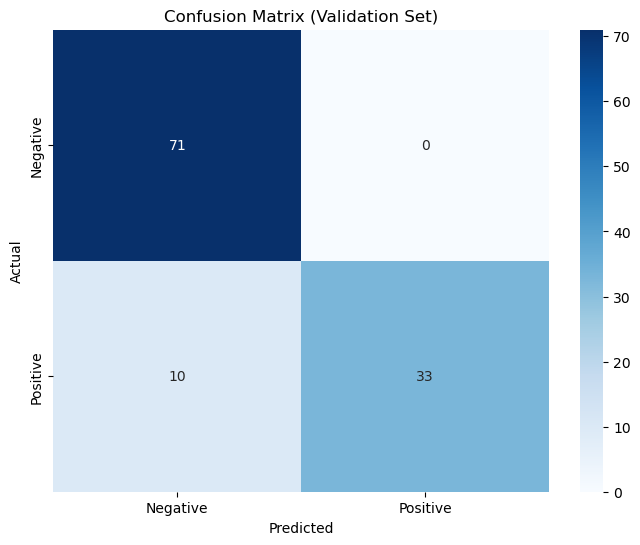

Training Time: 0.00 seconds
Validation Set Metrics:
Accuracy: 0.91
Precision: 1.00
Recall: 0.77
F1 Score: 0.87
Cross-Validation Scores:
[0.88405797 0.88235294 0.89705882 0.95588235 0.88235294]


In [149]:
#SVM
from sklearn.svm import SVC
# Initialize an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM on the training data
start_time = time.time()
svm_classifier.fit(x_train, y_train)
training_time = time.time() - start_time

# Plot the Validation Curve (Kernel)
param_range = ['linear', 'poly', 'rbf', 'sigmoid']  # Adjust these kernel types as needed
train_scores, valid_scores = validation_curve(
    svm_classifier, x_train, y_train, param_name="kernel", param_range=param_range, cv=5, scoring='accuracy'
)

# Define a range of C values to explore
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Calculate the validation curve
train_scores, valid_scores = validation_curve(
    svm_classifier, x_train, y_train, param_name="C", param_range=param_range, cv=5, scoring='accuracy'
)

# Plot the Validation Curve (C)
plt.figure()
plt.semilogx(param_range, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.semilogx(param_range, np.mean(valid_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Validation Curve for SVM (C)')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(param_range, np.mean(valid_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Validation Curve for SVM (Kernel)')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

# Make predictions on the validation set
y_pred_valid = svm_classifier.predict(x_valid)

# Create a confusion matrix heatmap
conf_matrix = confusion_matrix(y_valid, y_pred_valid)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Set)')
plt.show()

# Print training time
print(f"Training Time: {training_time:.2f} seconds")

# Calculate evaluation metrics on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
precision_valid = precision_score(y_valid, y_pred_valid)
recall_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

# Print the evaluation metrics for the validation set
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy_valid:.2f}")
print(f"Precision: {precision_valid:.2f}")
print(f"Recall: {recall_valid:.2f}")
print(f"F1 Score: {f1_valid:.2f}")
# Perform 5-fold cross-validation and calculate accuracy
cross_val_scores = cross_val_score(svm_classifier, x_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:")
print(cross_val_scores)

Best params for SVM: {'C': 1000.0, 'kernel': 'rbf'}
Accuracy for best SVM: 0.9385964912280702
Training Time (Validation): 0.76 seconds
Confusion Matrix (Validation):
 [[71  0]
 [ 7 36]]


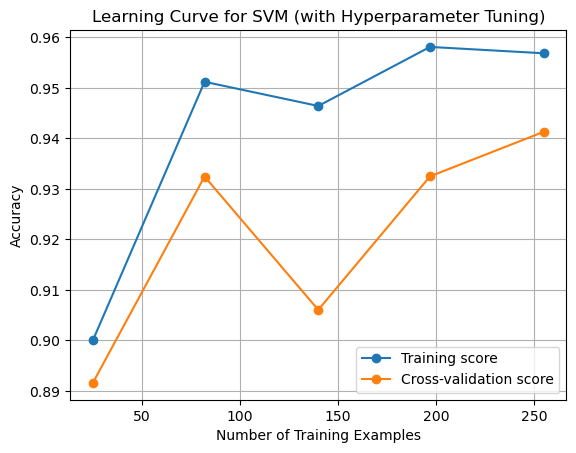

In [151]:
#tuning

# Initialize your SVM classifier
classifier_svm = SVC()

# Define the hyperparameter grid to search
param_grid = {'C': np.logspace(-3, 3, 10), 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Initialize GridSearchCV
classifier_svm_best = GridSearchCV(classifier_svm, param_grid=param_grid, cv=4)

# Train the SVM classifier with hyperparameter tuning on the validation set
start_time = time.time()
classifier_svm_best.fit(x_train, y_train)  # Use your validation set here
end_time = time.time()
training_time = end_time - start_time

# Print the best hyperparameters
print("Best params for SVM:", classifier_svm_best.best_params_)

# Predict on the validation set
y_pred_valid = classifier_svm_best.predict(x_valid)  # Use your validation set here

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)

# Print accuracy and training time
print("Accuracy for best SVM:", accuracy_valid)
print("Training Time (Validation): {:.2f} seconds".format(training_time))

# Print confusion matrix
confusion_valid = confusion_matrix(y_valid, y_pred_valid)
print("Confusion Matrix (Validation):\n", confusion_valid)

# Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    classifier_svm_best, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=4, scoring='accuracy'
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for SVM (with Hyperparameter Tuning)')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [153]:
precision_valid = precision_score(y_valid, y_pred_valid)
recall_valid = recall_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)

# Print other metrics
print("Validation Set Metrics:")
print("Precision:", precision_valid)
print("Recall:", recall_valid)
print("F1 Score:", f1_valid)

# Calculate cross-validation scores for the tuned model
cross_val_scores = cross_val_score(classifier_svm_best, x_train, y_train, cv=4, scoring='accuracy')
print("Cross-Validation Scores (Tuned Model):", cross_val_scores)

Validation Set Metrics:
Precision: 1.0
Recall: 0.8372093023255814
F1 Score: 0.9113924050632911
Cross-Validation Scores (Tuned Model): [0.95348837 0.91764706 0.92941176 0.95294118]


Confusion Matrix (Test Set):
 [[72  0]
 [ 2 40]]
Training Time: 0.01 seconds
Accuracy on Test Set: 0.98


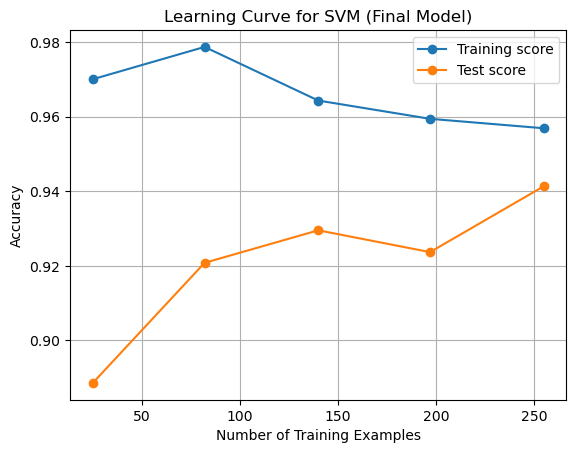

Test Set Metrics:
Accuracy: 0.98
Precision: 1.00
Recall: 0.95
F1 Score: 0.98


In [157]:
# Initialize and train the final SVM model with the best hyperparameters
final_svm_model = SVC(C=1000.0, kernel='rbf')
start_time = time.time()
final_svm_model.fit(x_train, y_train)  # Use your training data here
end_time = time.time()
training_time = end_time - start_time

# Predict on the test set
y_pred_test = final_svm_model.predict(x_test)  # Use your test set here

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print confusion matrix
confusion_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Set):\n", confusion_test)

# Print training time and accuracy
print("Training Time: {:.2f} seconds".format(training_time))
print("Accuracy on Test Set: {:.2f}".format(accuracy_test))

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    final_svm_model, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=4, scoring='accuracy'
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Test score')
plt.title('Learning Curve for SVM (Final Model)')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


# Calculate evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Test Set Metrics:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")

In [2]:
#KNN

Training time for KNN baseline model: 0.0009 seconds
Baseline KNN accuracy on validation set: 0.9561
Baseline KNN precision on validation set: 1.0000
Baseline KNN recall on validation set: 0.8837
Baseline KNN F1-score on validation set: 0.9383


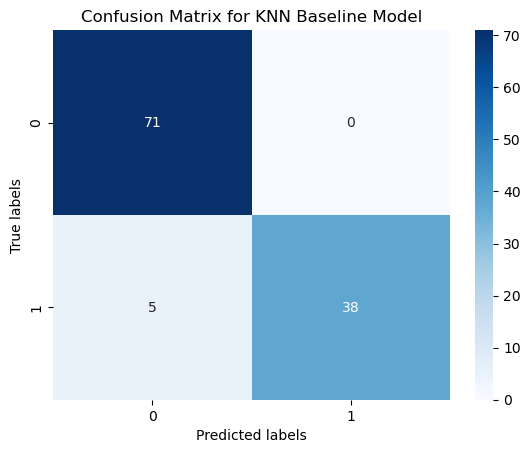

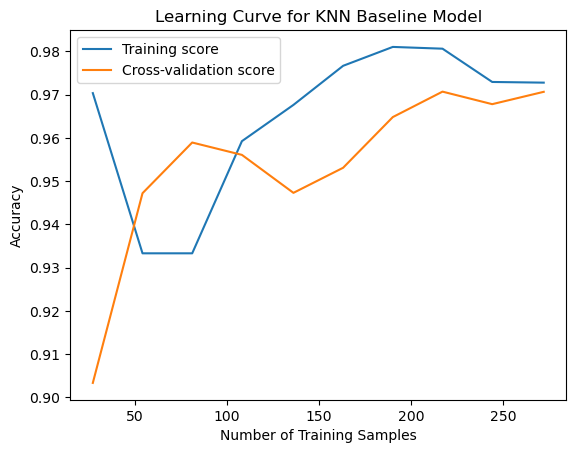

In [4]:
# 1. Baseline Model Training using KNN
knn = KNeighborsClassifier()

# Calculate training time
start_time = time.time()
knn.fit(x_train_scaled, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time for KNN baseline model: {training_time:.4f} seconds")

# Predictions on validation set
y_pred_valid = knn.predict(x_valid_scaled)

# Performance Metrics
baseline_accuracy = accuracy_score(y_valid, y_pred_valid)
baseline_precision = precision_score(y_valid, y_pred_valid)
baseline_recall = recall_score(y_valid, y_pred_valid)
baseline_f1 = f1_score(y_valid, y_pred_valid)

print(f"Baseline KNN accuracy on validation set: {baseline_accuracy:.4f}")
print(f"Baseline KNN precision on validation set: {baseline_precision:.4f}")
print(f"Baseline KNN recall on validation set: {baseline_recall:.4f}")
print(f"Baseline KNN F1-score on validation set: {baseline_f1:.4f}")

# Confusion Matrix
confusion = confusion_matrix(y_valid, y_pred_valid)
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN Baseline Model')
plt.show()

# 2. Learning Curves for Baseline Model
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(),
                                                        x_train_scaled, y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5, n_jobs=-1)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Learning Curve for KNN Baseline Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best hyperparameters: {'n_neighbors': 13, 'p': 2}
Mean Cross-Validation Score of Best Model: 0.9678


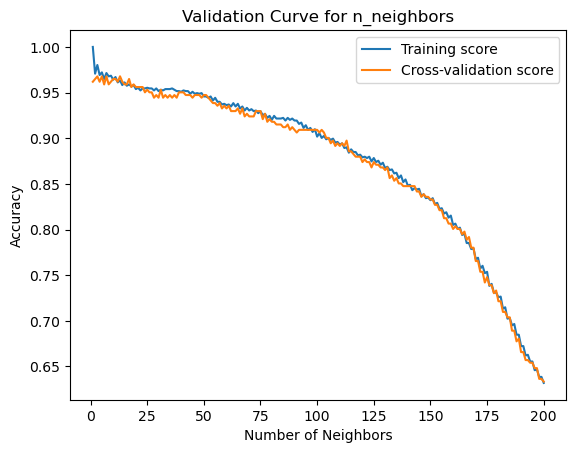

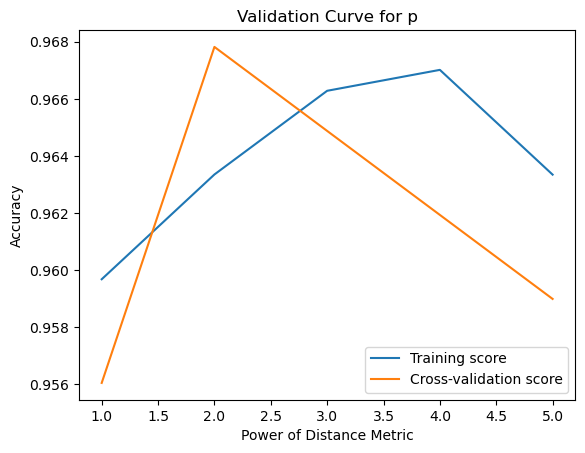

Best Model KNN accuracy on validation set: 0.9386
Best Model KNN precision on validation set: 1.0000
Best Model KNN recall on validation set: 0.8372
Best Model KNN F1-score on validation set: 0.9114

Training Time: 4.50 seconds

Confusion Matrix:
[[71  0]
 [ 7 36]]


In [19]:
# 2. Hyperparameter Tuning and Validation Curves
start_time = time.time()

# Only consider 'n_neighbors' and 'p' for tuning
params = {
    'n_neighbors': list(range(1, 201)),
    'p': list(range(1, 6))
}

grid = GridSearchCV(KNeighborsClassifier(), params, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid.fit(x_train_scaled, y_train)

# Stop the clock
end_time = time.time()

best_params = grid.best_params_
best_estimator = grid.best_estimator_
print(f"Best hyperparameters: {best_params}")

# Display the mean cross-validation score of the best model
print(f"Mean Cross-Validation Score of Best Model: {grid.best_score_:.4f}")

# Validation Curve for n_neighbors
param_range_k = list(range(1, 201))
train_scores_k, test_scores_k = validation_curve(KNeighborsClassifier(p=best_params['p']), 
                                                x_train_scaled, y_train, 
                                                param_name="n_neighbors", 
                                                param_range=param_range_k, 
                                                cv=5, scoring="accuracy", n_jobs=-1)
plt.figure()
plt.plot(param_range_k, np.mean(train_scores_k, axis=1), label='Training score')
plt.plot(param_range_k, np.mean(test_scores_k, axis=1), label='Cross-validation score')
plt.title('Validation Curve for n_neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# Validation Curve for p
param_range_p = list(range(1, 6))
train_scores_p, test_scores_p = validation_curve(KNeighborsClassifier(n_neighbors=best_params['n_neighbors']), 
                                                x_train_scaled, y_train, 
                                                param_name="p", 
                                                param_range=param_range_p, 
                                                cv=5, scoring="accuracy", n_jobs=-1)
plt.figure()
plt.plot(param_range_p, np.mean(train_scores_p, axis=1), label='Training score')
plt.plot(param_range_p, np.mean(test_scores_p, axis=1), label='Cross-validation score')
plt.title('Validation Curve for p')
plt.xlabel('Power of Distance Metric')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# Performance Metrics on Validation Set for Best Model
y_pred_valid_best = best_estimator.predict(x_valid_scaled)
confusion = confusion_matrix(y_valid, y_pred_valid_best)
accuracy_best = accuracy_score(y_valid, y_pred_valid_best)
precision_best = precision_score(y_valid, y_pred_valid_best)
recall_best = recall_score(y_valid, y_pred_valid_best)
f1_best = f1_score(y_valid, y_pred_valid_best)

print(f"Best Model KNN accuracy on validation set: {accuracy_best:.4f}")
print(f"Best Model KNN precision on validation set: {precision_best:.4f}")
print(f"Best Model KNN recall on validation set: {recall_best:.4f}")
print(f"Best Model KNN F1-score on validation set: {f1_best:.4f}")
print(f"\nTraining Time: {end_time - start_time:.2f} seconds")

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion)

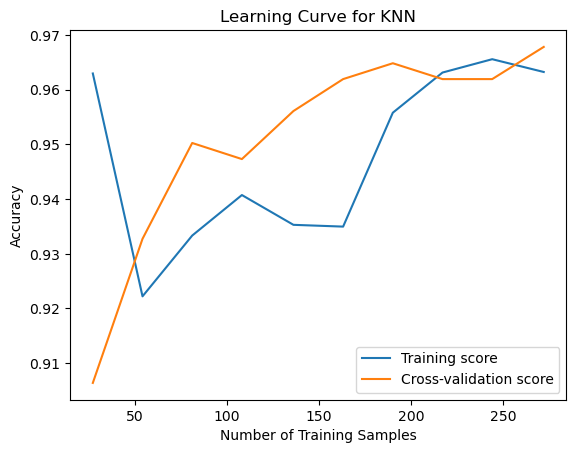

In [20]:
# 3. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(**best_params),
                                                        x_train_scaled, y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Learning Curve for KNN')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [16]:
# Extracting only 'n_neighbors' and 'p' from the best parameters
best_k = best_params['n_neighbors']
best_p = best_params['p']

# Combine the training and validation datasets
x_combined = np.vstack((x_train_scaled, x_valid_scaled))
y_combined = np.hstack((y_train, y_valid))

# Train on the combined dataset using the best hyperparameters for k and p
start_time = time.time()

knn_best = KNeighborsClassifier(n_neighbors=best_k, p=best_p)
knn_best.fit(x_combined, y_combined)

end_time = time.time()
training_time = end_time - start_time

# Predict and compute metrics
y_pred_test = knn_best.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Use the learning_curve function to get training sizes, training scores, and validation scores
train_sizes, train_scores, valid_scores = learning_curve(knn_best, 
                                                        np.vstack([x_train_scaled, x_valid_scaled]), 
                                                        np.concatenate([y_train, y_valid]),
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5)

# To get the average training and validation scores for each training set size:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

# Printing out the scores
print("Training set sizes:", train_sizes)
print("Training scores (for each training set size):", train_scores_mean)
print("Validation scores (for each training set size):", valid_scores_mean)

# Print the results
print(f"Optimized KNN accuracy on test set: {accuracy:.4f}")
print(f"Optimized KNN precision on test set: {precision:.4f}")
print(f"Optimized KNN recall on test set: {recall:.4f}")
print(f"Optimized KNN F1-score on test set: {f1:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

Training set sizes: [ 36  72 109 145 182 218 254 291 327 364]
Training scores (for each training set size): [0.93333333 0.91111111 0.94862385 0.95034483 0.96483516 0.96697248
 0.96929134 0.97250859 0.97247706 0.97197802]
Validation scores (for each training set size): [0.94505495 0.95604396 0.95604396 0.95384615 0.96043956 0.95824176
 0.95604396 0.95384615 0.96263736 0.96263736]
Optimized KNN accuracy on test set: 0.9737
Optimized KNN precision on test set: 1.0000
Optimized KNN recall on test set: 0.9286
Optimized KNN F1-score on test set: 0.9630
Training Time: 0.00 seconds


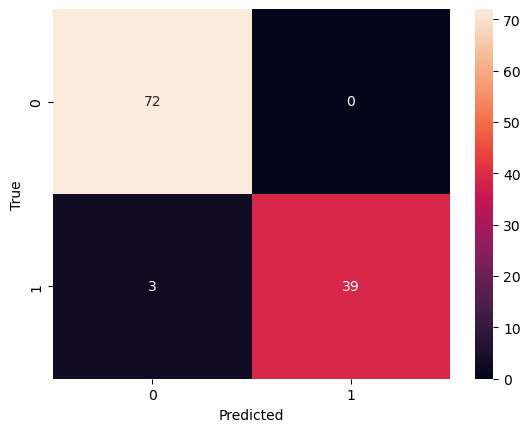

In [17]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

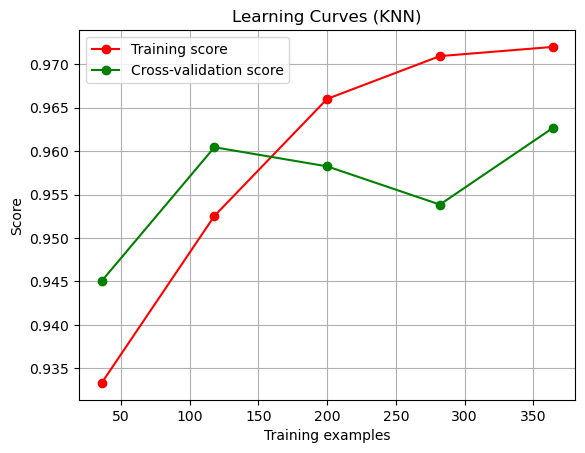

In [18]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

title = "Learning Curves (KNN)"
cv = 5  # Number of cross-validation splits 
plot_learning_curve(knn_best, title, x_combined, y_combined, cv=cv)
plt.show()